In [164]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import arabic_reshaper
from bidi.algorithm import get_display
import os
import codecs
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pickle

# Reading Arabic_tweets_positive dataset

In [165]:
#set erro_bad_lines = False, it needed when the csv has too many commas
cols = ['class','tweet_text']
positive = pd.read_csv('data/Arabic_tweets_positive_20190413.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [166]:
positive.head(50)

class                                         tweet_text
0    pos                            ÿπŸÑŸäŸäŸÉ ÿßŸÑŸÑŸá ŸÇŸÅŸÑ ŸÖŸäÿ™ŸäŸÜŸÉ ‚ù§
1    pos  ÿ∑Ÿäÿßÿ± ÿπÿ±ÿßŸÇŸä Ÿäÿ≥ÿßŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑŸÖÿ±ÿßŸÇÿ®ÿ© ŸÅŸä ÿ≥ŸÑÿ∑ŸÜÿ© ÿπŸÖÿßŸÜ ÿπŸÜ ...
2    pos                       ÿπŸÑŸÖŸáŸÖ ÿ™ŸÉŸÅŸâ ÿ≠ÿ≥ÿ®Ÿä ÿßŸÑŸÑŸá ÿπŸÑŸäŸáŸÖ üôÇ
3    pos  üçÄ ŸàÿπŸÜ ÿ∞ŸÉÿ± ÿßŸÑŸÑŸá ŸÑÿß ÿ™ÿ∫ŸÅŸÑŸàŸÜ ŸÑÿß ÿ•ŸÑŸá ÿ•ŸÑÿß ÿßŸÑŸÑŸá ŸÑÿß ÿ•ŸÑ...
4    pos  ŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿ¨ŸÖŸáŸàÿ± #ÿßŸÑÿßŸáŸÑŸä ŸäŸÇŸàŸÑ ŸÑŸä ÿπÿ∑ŸÜÿß ÿ™ÿ¥ŸÉŸäŸÑÿ© #ÿßŸÑŸá...
5    pos  ü¶ã . . . . "ŸÅŸäŸÜŸä #ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑŸÅÿ±ÿ≠ Ÿàÿ£ÿ∫ŸÑÿ® ÿ™ŸÅÿßÿµŸäŸÑŸä ÿ≤...
6    pos  #ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá üíô ÿ¢Ÿá Ÿäÿß ÿπŸÖÿ±Ÿä Ÿäÿß ÿßŸÑÿ≤ÿπŸäŸÖ...
7    pos  ÿ£ÿ∫ŸÜŸäÿ© ÿ™ÿßŸäŸÑŸàÿ± ÿ≥ŸàŸäŸÅÿ™ #ÿßŸÑŸÇŸàÿ≥ ŸÖÿπ ÿ∫ÿßÿ±Ÿä ŸÑÿßŸäÿ™ÿ®ŸàÿØŸä #ÿßŸÑ...
8    pos  üåÖ ÿ™ÿ∞ŸÉŸäÿ± ŸÖŸáŸÖ üåÖ . ŸÇÿßŸÑ ÿ±ÿ≥ŸàŸÑ ÿßŸÑŸÑŸá Ô∑∫: ŸÑÿß Ÿäÿ≠ÿßŸÅÿ∏ ÿπŸÑŸâ ...
9    pos        ÿ¨ŸÜÿßÿ®Ÿà ÿ≤ÿßÿ™Ÿà ŸÖÿ≠ÿ™ÿßÿ± " ÿßÿ™ŸÜŸäŸÜ ŸÅŸä ŸäŸàŸÖŸäŸÜ Ÿäÿ¨ŸÖÿßÿπŸá" üòÇ
10   pos  ÿßŸÑŸäŸàŸÖ ŸÑŸäŸÑÿ© ÿ¨ŸÑÿØ ŸÖÿØŸÑŸÑ ÿ¨ÿØÿ© Ÿàÿ∫ÿØÿß ÿ¨ŸÑÿØ ÿßŸÑÿπÿßŸÑŸÖŸä ÿßŸÑŸÖÿ≤Ÿä...
11   pos  ŸáŸÖÿ≥ÿ© .. ŸÖŸáŸÖÿß ÿ®ÿØÿ™ ŸÑŸÉ ÿßŸÑÿ£ŸÖŸàÿ± ŸÖÿ≥ÿ™ÿ≠ŸäŸÑÿ© .. ÿ™ÿ∞ŸÉÿ± ŸÇŸàŸÑ...
12   pos  ÿµÿ®ÿßÿ≠ ÿßÿ±ÿÆŸÖ ŸäŸàŸÖ ŸÅŸä ÿßŸÑÿ£ÿ≥ÿ®Ÿàÿπ ŸäŸàŸÖ #ÿßŸÑÿ≥ÿ®ÿ™ ü§£ #ÿµÿ®ÿßÿ≠_ÿßŸÑÿÆŸäÿ±
13   pos  ÿßÿπÿ™ŸÇÿØ ÿßŸÜ ÿßŸÑŸÉŸÑ ŸàÿµŸÑ ŸÑŸÖÿ±ÿ≠ŸÑŸá ÿßŸÑÿßÿ≥ÿ™ÿ∫ŸÜÿßÿ° ÿßŸÑŸÉŸÑ ŸàÿµŸÑ ŸÑŸÑ...
14   pos  ÿ∑Ÿäÿßÿ± ÿπÿ±ÿßŸÇŸä Ÿäÿ≥ÿßŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑŸÖÿ±ÿßŸÇÿ®ÿ© ŸÅŸä ÿ≥ŸÑÿ∑ŸÜÿ© ÿπŸÖÿßŸÜ ÿπŸÜ ...
15   pos    ÿßŸÑŸÑŸáŸÖ ÿ¢ŸÖŸäŸÜ üåß ŸÖÿ¥ÿ¥ÿßÿ° ÿßŸÑŸÑŸá üòä ÿ¨ŸÑÿ≥ÿ™ŸÉŸÖ ÿ™ŸÅÿ™ÿ≠ ÿßŸÑŸÜŸÅÿ≥ üëåüèªüåπ
16   pos  ÿßŸÑŸáŸÑÿßŸÑŸä ÿßŸÑŸÑŸä ŸÖÿ™ÿ≠ÿ≤ŸÖ ÿ®ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖÿ´ŸÑ ÿßŸÑŸÜÿµÿ±ÿßŸàŸä ÿßŸÑŸÑŸä ...
17   pos  ŸäŸÖÿ±ŸàŸÜ ÿßŸÑÿ®ÿ¥ÿ± ŸÅŸä ÿµÿØÿ±Ÿä ŸÖÿ±Ÿàÿ± ÿßŸÑÿ£ŸÜŸÅÿßÿ≥ ŸàÿßŸÜÿ™ ÿßŸÑŸàÿ≠ŸäÿØ ÿß...
18   pos  ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑŸÇÿ™ŸÑŸä ŸàÿßŸÑÿ¨ÿ±ÿ≠Ÿä ŸÅŸä #ÿ∑ÿ±ÿßÿ®ŸÑÿ≥ ÿ®ÿπÿØ Ÿáÿ¨ŸàŸÖ ŸÖŸäŸÑÿ¥Ÿä...
19   pos                              ŸÖŸÜ ÿ£ŸÖŸÜŸäÿßÿ™ ÿßŸÑÿ∑ŸÅŸàŸÑÿ©.. üíô
20   pos                   ÿ≥ŸáŸÑ ÿ™ŸÉŸàŸÜ ŸÜÿ¨ŸÖ ŸÑŸÉŸÜ ÿµÿπÿ® ÿ™ŸÉŸàŸÜ ÿ≠ÿ≥ŸäŸÜ üíö
21   pos    ŸÇÿ®ÿ∑ÿßŸÜ ŸàŸÖÿßŸÅŸä ŸÉŸÑÿßŸÖ ŸàÿßŸÜÿß ÿßŸÇŸàŸÑ ÿßŸÜÿ™Ÿá ÿ¨ÿßŸäÿ®Ÿáÿß ŸÖŸÜ ŸàŸäŸÜ ü§£
22   pos                                  ÿ≥ÿßŸäÿ®ŸáÿßŸÑŸÉ ŸäÿÆÿ™Ÿä üòÇ üòÇ
23   pos  üé• ŸÖŸÑÿÆÿµ ŸÖÿ®ÿßÿ±ÿßÿ© ÿßŸÑÿ£ŸáŸÑŸä : ÿßŸÑŸáŸÑÿßŸÑ #ÿßŸÑÿ£ŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ #MBS
24   pos  Ÿà ŸÑÿπŸÑ ÿßŸÑŸÑŸá ŸäÿØÿ®ÿ± ŸÑŸÉ ÿ¥Ÿäÿ¶ÿß Ÿäÿ±ÿ∂ŸäŸÉ ÿ®Ÿá ÿ¥Ÿäÿ¶ÿß Ÿäÿ¨ÿπŸÑŸÉ ÿ™ÿ≥...
25   pos                                     ÿµÿ®ÿßÿ≠ ÿßŸÑÿÆŸäŸäÿ± ‚ò∫Ô∏è
26   pos                                  ÿßŸÑŸÑŸáŸÖ ÿ¢ŸÖŸäŸÜ ÿ™ÿ≥ŸÑŸÖ üåπ
27   pos                        Ÿäÿßÿ±Ÿäÿ™ ÿ™ŸÇÿ±ŸÅŸäŸÜÿß ŸÉŸÑ ŸäŸàŸÖ ÿ®ŸÇŸâ üòÇüòÇ
28   pos          ŸÜŸÅÿ≥Ÿä ŸàŸáŸÖŸàÿ™ Ÿàÿßÿ®ÿ∑ŸÑ ŸÉÿ≥ŸÑ ŸàŸÑŸÉŸÜ ŸÖŸÉÿ≥ŸÑ ÿßÿ®ÿ∑ŸÑ ŸÉÿ≥ŸÑ üòÇ
29   pos  ÿµÿ≠Ÿäÿ™ ŸÖŸÜ ÿßŸÑŸÜŸàŸÖ ŸÑÿ®ÿ≥ÿ™ ÿßÿ≠ŸÖÿ± Ÿàÿ≠ÿ∑ÿ™ ÿßÿ≠ŸÖÿ±. ŸàŸáŸäÿß ŸÖÿÆŸÜŸàŸÇŸá...
30   pos  ÿßŸÑÿ®ÿßŸÇŸäÿßÿ™ ÿßŸÑÿµÿßŸÑÿ≠ÿßÿ™ : üå∑ ‚Ä¢ ÿ≥ÿ®ÿ≠ÿßŸÜ ÿßŸÑŸÑŸá .. ‚Ä¢ ŸàÿßŸÑÿ≠ŸÖÿØ...
31   pos  ÿßŸÑŸÑŸáŸÖ Ÿäÿß ÿ¥ÿßŸÅŸä Ÿäÿß ŸÖÿπÿßŸÅŸä ÿßŸÜÿ≤ŸÑ ÿπÿßŸÅŸäÿ™ŸÉ Ÿà ÿ¥ŸÅÿßÿ§ŸÉ ÿπŸÑŸâ...
32   pos  ŸäŸÇŸàŸÑ ÿπÿ≤ Ÿàÿ¨ŸÑ ( ŸÑŸÇÿØ ÿÆŸÑŸÇŸÜÿß ÿßŸÑÿ•ŸÜÿ≥ÿßŸÜ ŸÅŸä ÿ£ÿ≠ÿ≥ŸÜ ÿ™ŸÇŸàŸäŸÖ ...
33   pos  ÿßŸÜÿß ŸÉŸÑ ÿßÿ®ÿ±ŸäŸÑ ŸÑÿßÿ≤ŸÖ ÿßÿ¥ŸÉÿ± ŸÉŸÑ ÿßŸÑŸÑŸä ÿ®ŸäŸÇŸàŸÑŸÑŸä ŸÉŸÑ ÿ≥ŸÜÿ© ...
34   pos  ÿßÿ®ÿ±ŸäŸÑ : ÿßŸÑŸÑŸáŸÖ ÿßÿ¨ÿπŸÑ Ÿáÿ∞ÿß ÿßŸÑŸäŸàŸÖ ŸÅÿ±ÿ≠Ÿá ŸÑÿß ÿ™ŸÜÿ≥Ÿâ ŸÑÿ¨ŸÖÿß...
35   pos  ÿßŸÑŸÑŸáŸÖ ÿµŸÑ Ÿàÿ≥ŸÑŸÖ ÿπŸÑŸâ ŸÜÿ®ŸäŸÜÿß ŸÖÿ≠ŸÖÿØ ÿπŸÑŸäŸá ÿßŸÅÿ∂ŸÑ ÿßŸÑÿµŸÑÿßÿ© ...
36   pos                     ÿÆŸÑŸäŸÜÿß ŸÜÿØŸàÿ± ÿπŸÑŸâ ÿßŸÑÿßŸäÿ¨ÿßÿ®ŸäŸá ÿ∫ÿµÿ® üôÇ
37   pos  ÿßŸàŸÉ ÿßÿ∫ŸÜŸäÿ© bts ÿπÿ¨ÿ®ÿ™ŸÜŸä ŸÖÿ±ÿß Ÿàÿßÿ≠ÿ≥ ÿßŸàŸÑ ŸÖÿ±ÿß Ÿäÿ±ŸÇÿµŸàŸÜ ÿ±...
38   pos                                 ŸÉŸÅŸàŸà ŸäÿßÿπŸäÿßŸÑ ÿ≤ÿßŸäÿØ üíê
39   pos  Ÿäÿ™ÿ≠ÿØÿ´ŸàŸÜ ÿπŸÜ ÿßÿÆŸÑÿßŸÇ ÿ≠ÿ≥ŸäŸÜ ŸàŸÜÿ¨ŸàŸÖ ŸÅÿ±ŸÇŸáŸÖ ŸÜŸáÿßŸäÿßÿ™ŸáŸÖ ÿßŸÑÿ±...
40   pos                            ŸÖÿßÿ±ÿ≠ ŸäŸÅŸáŸÖŸàŸÜ ŸÉŸÑÿßÿ® ŸáŸÑÿßŸÑ üòÇ
41   pos  ÿ±ÿ¶Ÿäÿ≥ ÿßŸÑŸÖÿ¨ŸÑÿ≥ ÿßŸÑÿπÿ≥ŸÉÿ±Ÿä ÿßŸÑÿ≥ŸàÿØÿßŸÜŸä ÿßŸÑŸÅÿ±ŸäŸÇ ÿßŸÑÿ±ŸÉŸÜ #ÿπŸàÿ∂...
42   pos  ŸÑŸà Ÿäÿ≠ÿ∑ ÿ´ŸÑÿßÿ´ ÿ®Ÿäÿ™ÿ±Ÿ

# Total no. of positive twittes

In [167]:
len(positive)

28536

# Sample of the positive twittes text

In [168]:
positive['tweet_text'].head(10)

0                              ÿπŸÑŸäŸäŸÉ ÿßŸÑŸÑŸá ŸÇŸÅŸÑ ŸÖŸäÿ™ŸäŸÜŸÉ ‚ù§
1    ÿ∑Ÿäÿßÿ± ÿπÿ±ÿßŸÇŸä Ÿäÿ≥ÿßŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑŸÖÿ±ÿßŸÇÿ®ÿ© ŸÅŸä ÿ≥ŸÑÿ∑ŸÜÿ© ÿπŸÖÿßŸÜ ÿπŸÜ ...
2                         ÿπŸÑŸÖŸáŸÖ ÿ™ŸÉŸÅŸâ ÿ≠ÿ≥ÿ®Ÿä ÿßŸÑŸÑŸá ÿπŸÑŸäŸáŸÖ üôÇ
3    üçÄ ŸàÿπŸÜ ÿ∞ŸÉÿ± ÿßŸÑŸÑŸá ŸÑÿß ÿ™ÿ∫ŸÅŸÑŸàŸÜ ŸÑÿß ÿ•ŸÑŸá ÿ•ŸÑÿß ÿßŸÑŸÑŸá ŸÑÿß ÿ•ŸÑ...
4    ŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿ¨ŸÖŸáŸàÿ± #ÿßŸÑÿßŸáŸÑŸä ŸäŸÇŸàŸÑ ŸÑŸä ÿπÿ∑ŸÜÿß ÿ™ÿ¥ŸÉŸäŸÑÿ© #ÿßŸÑŸá...
5    ü¶ã . . . . "ŸÅŸäŸÜŸä #ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑŸÅÿ±ÿ≠ Ÿàÿ£ÿ∫ŸÑÿ® ÿ™ŸÅÿßÿµŸäŸÑŸä ÿ≤...
6    #ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá üíô ÿ¢Ÿá Ÿäÿß ÿπŸÖÿ±Ÿä Ÿäÿß ÿßŸÑÿ≤ÿπŸäŸÖ...
7    ÿ£ÿ∫ŸÜŸäÿ© ÿ™ÿßŸäŸÑŸàÿ± ÿ≥ŸàŸäŸÅÿ™ #ÿßŸÑŸÇŸàÿ≥ ŸÖÿπ ÿ∫ÿßÿ±Ÿä ŸÑÿßŸäÿ™ÿ®ŸàÿØŸä #ÿßŸÑ...
8    üåÖ ÿ™ÿ∞ŸÉŸäÿ± ŸÖŸáŸÖ üåÖ . ŸÇÿßŸÑ ÿ±ÿ≥ŸàŸÑ ÿßŸÑŸÑŸá Ô∑∫: ŸÑÿß Ÿäÿ≠ÿßŸÅÿ∏ ÿπŸÑŸâ ...
9          ÿ¨ŸÜÿßÿ®Ÿà ÿ≤ÿßÿ™Ÿà ŸÖÿ≠ÿ™ÿßÿ± " ÿßÿ™ŸÜŸäŸÜ ŸÅŸä ŸäŸàŸÖŸäŸÜ Ÿäÿ¨ŸÖÿßÿπŸá" üòÇ
Name: tweet_text, dtype: object

# Sample of the target 

In [169]:
positive['class'].head()

0    pos
1    pos
2    pos
3    pos
4    pos
Name: class, dtype: object

# EDA on the postive dataset

In [170]:
np.sum(positive.isnull().any(axis=1))

0

In [171]:
positive.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [172]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       28536 non-null  object
 1   tweet_text  28536 non-null  object
dtypes: object(2)
memory usage: 446.0+ KB


# Cleaning the text

In [173]:
for letter in '#.][!XRÔ∑∫':
    positive['tweet_text'] = positive['tweet_text'].astype(str).str.replace(letter,'')

In [174]:
positive.head(10)

class                                         tweet_text
0   pos                            ÿπŸÑŸäŸäŸÉ ÿßŸÑŸÑŸá ŸÇŸÅŸÑ ŸÖŸäÿ™ŸäŸÜŸÉ ‚ù§
1   pos  ÿ∑Ÿäÿßÿ± ÿπÿ±ÿßŸÇŸä Ÿäÿ≥ÿßŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑŸÖÿ±ÿßŸÇÿ®ÿ© ŸÅŸä ÿ≥ŸÑÿ∑ŸÜÿ© ÿπŸÖÿßŸÜ ÿπŸÜ ...
2   pos                       ÿπŸÑŸÖŸáŸÖ ÿ™ŸÉŸÅŸâ ÿ≠ÿ≥ÿ®Ÿä ÿßŸÑŸÑŸá ÿπŸÑŸäŸáŸÖ üôÇ
3   pos  üçÄ ŸàÿπŸÜ ÿ∞ŸÉÿ± ÿßŸÑŸÑŸá ŸÑÿß ÿ™ÿ∫ŸÅŸÑŸàŸÜ ŸÑÿß ÿ•ŸÑŸá ÿ•ŸÑÿß ÿßŸÑŸÑŸá ŸÑÿß ÿ•ŸÑ...
4   pos  ŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿ¨ŸÖŸáŸàÿ± ÿßŸÑÿßŸáŸÑŸä ŸäŸÇŸàŸÑ ŸÑŸä ÿπÿ∑ŸÜÿß ÿ™ÿ¥ŸÉŸäŸÑÿ© ÿßŸÑŸáŸÑÿß...
5   pos  ü¶ã     "ŸÅŸäŸÜŸä ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑŸÅÿ±ÿ≠ Ÿàÿ£ÿ∫ŸÑÿ® ÿ™ŸÅÿßÿµŸäŸÑŸä ÿ≤ÿ≠ÿßŸÖ ŸÖ...
6   pos  ÿßŸÑÿßŸáŸÑŸä_ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÑÿ≠ŸÖÿØŸÑŸÑŸá üíô ÿ¢Ÿá Ÿäÿß ÿπŸÖÿ±Ÿä Ÿäÿß ÿßŸÑÿ≤ÿπŸäŸÖ ...
7   pos  ÿ£ÿ∫ŸÜŸäÿ© ÿ™ÿßŸäŸÑŸàÿ± ÿ≥ŸàŸäŸÅÿ™ ÿßŸÑŸÇŸàÿ≥ ŸÖÿπ ÿ∫ÿßÿ±Ÿä ŸÑÿßŸäÿ™ÿ®ŸàÿØŸä ÿßŸÑÿ¨Ÿà...
8   pos  üåÖ ÿ™ÿ∞ŸÉŸäÿ± ŸÖŸáŸÖ üåÖ  ŸÇÿßŸÑ ÿ±ÿ≥ŸàŸÑ ÿßŸÑŸÑŸá : ŸÑÿß Ÿäÿ≠ÿßŸÅÿ∏ ÿπŸÑŸâ ÿµŸÑ...
9   pos        ÿ¨ŸÜÿßÿ®Ÿà ÿ≤ÿßÿ™Ÿà ŸÖÿ≠ÿ™ÿßÿ± " ÿßÿ™ŸÜŸäŸÜ ŸÅŸä ŸäŸàŸÖŸäŸÜ Ÿäÿ¨ŸÖÿßÿπŸá" üòÇ

using (import string) which is return all ASCII letters (both lower and upper case)

In [175]:
arabic_punctuations = '''`√∑√óÿõ<>_()*&^%][ŸÄÿå/:"ÿü.,'{}~¬¶+|!‚Äù‚Ä¶‚Äú‚ÄìŸÄ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

use of regular expression (re) substitution

In [176]:
def normalize_arabic(text):
    text = re.sub("[ÿ•ÿ£ÿ¢ÿß]", "ÿß", text)
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ©", "Ÿá", text)
    text = re.sub("⁄Ø", "ŸÉ", text)
    return text

In [177]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
    

In [178]:
def processPost(tweet): 

    #delete @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #delete www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    tweet = re.sub(r'\s*[A-Za-z]+\b', '' , tweet)
    tweet = tweet.rstrip()
    
    return tweet

In [179]:
# using apply method to implement the processPost func on each value in each row in the data
positive["tweet_text"] = positive['tweet_text'].apply(lambda x: processPost(x)) 

In [181]:
positive.head(25)


class                                         tweet_text
0    pos                              ÿπŸÑŸäŸÉ ÿßŸÑŸá ŸÇŸÅŸÑ ŸÖŸäÿ™ŸäŸÜŸÉ ‚ù§
1    pos  ÿ∑Ÿäÿßÿ± ÿπÿ±ÿßŸÇŸä Ÿäÿ≥ÿßŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑŸÖÿ±ÿßŸÇÿ®Ÿá ŸÅŸä ÿ≥ŸÑÿ∑ŸÜŸá ÿπŸÖÿßŸÜ ÿπŸÜ ...
2    pos                        ÿπŸÑŸÖŸáŸÖ ÿ™ŸÉŸÅŸä ÿ≠ÿ≥ÿ®Ÿä ÿßŸÑŸá ÿπŸÑŸäŸáŸÖ üôÇ
3    pos  üçÄ ŸàÿπŸÜ ÿ∞ŸÉÿ± ÿßŸÑŸá ŸÑÿß ÿ™ÿ∫ŸÅŸÑŸàŸÜ ŸÑÿß ÿßŸÑŸá ÿßŸÑÿß ÿßŸÑŸá ŸÑÿß ÿßŸÑŸá ...
4    pos  ŸÉÿ´Ÿäÿ± ŸÖŸÜ ÿ¨ŸÖŸáŸàÿ± ÿßŸÑÿßŸáŸÑŸä ŸäŸÇŸàŸÑ ŸÑŸä ÿπÿ∑ŸÜÿß ÿ™ÿ¥ŸÉŸäŸÑŸá ÿßŸÑŸáŸÑÿß...
5    pos  ü¶ã ŸÅŸäŸÜŸä ŸÇŸÑŸäŸÑ ŸÖŸÜ ÿßŸÑŸÅÿ±ÿ≠ Ÿàÿßÿ∫ŸÑÿ® ÿ™ŸÅÿßÿµŸäŸÑŸä ÿ≤ÿ≠ÿßŸÖ ŸÖÿß ÿ®ŸäŸÜ...
6    pos  ÿßŸÑÿßŸáŸÑŸäÿßŸÑŸáŸÑÿßŸÑ ÿßŸÑÿ≠ŸÖÿØŸÑŸá üíô ÿßŸá Ÿäÿß ÿπŸÖÿ±Ÿä Ÿäÿß ÿßŸÑÿ≤ÿπŸäŸÖ ÿ≠ÿ∂...
7    pos  ÿßÿ∫ŸÜŸäŸá ÿ™ÿßŸäŸÑŸàÿ± ÿ≥ŸàŸäŸÅÿ™ ÿßŸÑŸÇŸàÿ≥ ŸÖÿπ ÿ∫ÿßÿ±Ÿä ŸÑÿßŸäÿ™ÿ®ŸàÿØŸä ÿßŸÑÿ¨Ÿà...
8    pos  üåÖ ÿ™ÿ∞ŸÉŸäÿ± ŸÖŸáŸÖ üåÖ ŸÇÿßŸÑ ÿ±ÿ≥ŸàŸÑ ÿßŸÑŸá ŸÑÿß Ÿäÿ≠ÿßŸÅÿ∏ ÿπŸÑŸä ÿµŸÑÿßŸá ÿß...
9    pos           ÿ¨ŸÜÿßÿ®Ÿà ÿ≤ÿßÿ™Ÿà ŸÖÿ≠ÿ™ÿßÿ± ÿßÿ™ŸÜŸäŸÜ ŸÅŸä ŸäŸàŸÖŸäŸÜ Ÿäÿ¨ŸÖÿßÿπŸá üòÇ
10   pos  ÿßŸÑŸäŸàŸÖ ŸÑŸäŸÑŸá ÿ¨ŸÑÿØ ŸÖÿØŸÑ ÿ¨ÿØŸá Ÿàÿ∫ÿØÿß ÿ¨ŸÑÿØ ÿßŸÑÿπÿßŸÑŸÖŸä ÿßŸÑŸÖÿ≤ŸäŸÅ...
11   pos  ŸáŸÖÿ≥Ÿá ŸÖŸáŸÖÿß ÿ®ÿØÿ™ ŸÑŸÉ ÿßŸÑÿßŸÖŸàÿ± ŸÖÿ≥ÿ™ÿ≠ŸäŸÑŸá ÿ™ÿ∞ŸÉÿ± ŸÇŸàŸÑŸá ÿ™ÿπÿßŸÑ...
12   pos     ÿµÿ®ÿßÿ≠ ÿßÿ±ÿÆŸÖ ŸäŸàŸÖ ŸÅŸä ÿßŸÑÿßÿ≥ÿ®Ÿàÿπ ŸäŸàŸÖ ÿßŸÑÿ≥ÿ®ÿ™ ü§£ ÿµÿ®ÿßÿ≠ÿßŸÑÿÆŸäÿ±
13   pos  ÿßÿπÿ™ŸÇÿØ ÿßŸÜ ÿßŸÑŸÉŸÑ ŸàÿµŸÑ ŸÑŸÖÿ±ÿ≠ŸÑŸá ÿßŸÑÿßÿ≥ÿ™ÿ∫ŸÜÿßÿ° ÿßŸÑŸÉŸÑ ŸàÿµŸÑ ŸÑŸÜ...
14   pos  ÿ∑Ÿäÿßÿ± ÿπÿ±ÿßŸÇŸä Ÿäÿ≥ÿßŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑŸÖÿ±ÿßŸÇÿ®Ÿá ŸÅŸä ÿ≥ŸÑÿ∑ŸÜŸá ÿπŸÖÿßŸÜ ÿπŸÜ ...
15   pos       ÿßŸÑŸáŸÖ ÿßŸÖŸäŸÜ üåß ŸÖÿ¥ÿßÿ° ÿßŸÑŸá üòä ÿ¨ŸÑÿ≥ÿ™ŸÉŸÖ ÿ™ŸÅÿ™ÿ≠ ÿßŸÑŸÜŸÅÿ≥ üëåüèªüåπ
16   pos  ÿßŸÑŸáŸÑÿßŸÑŸä ÿßŸÑŸä ŸÖÿ™ÿ≠ÿ≤ŸÖ ÿ®ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ŸÖÿ´ŸÑ ÿßŸÑŸÜÿµÿ±ÿßŸàŸä ÿßŸÑŸä ŸÖÿ™...
17   pos  ŸäŸÖÿ±ŸàŸÜ ÿßŸÑÿ®ÿ¥ÿ± ŸÅŸä ÿµÿØÿ±Ÿä ŸÖÿ±Ÿàÿ± ÿßŸÑÿßŸÜŸÅÿßÿ≥ ŸàÿßŸÜÿ™ ÿßŸÑŸàÿ≠ŸäÿØ ÿß...
18   pos  ÿπÿ¥ÿ±ÿßÿ™ ÿßŸÑŸÇÿ™ŸÑŸä ŸàÿßŸÑÿ¨ÿ±ÿ≠Ÿä ŸÅŸä ÿ∑ÿ±ÿßÿ®ŸÑÿ≥ ÿ®ÿπÿØ Ÿáÿ¨ŸàŸÖ ŸÖŸäŸÑÿ¥Ÿäÿß...
19   pos                                ŸÖŸÜ ÿßŸÖŸÜŸäÿßÿ™ ÿßŸÑÿ∑ŸÅŸàŸÑŸá üíô
20   pos                   ÿ≥ŸáŸÑ ÿ™ŸÉŸàŸÜ ŸÜÿ¨ŸÖ ŸÑŸÉŸÜ ÿµÿπÿ® ÿ™ŸÉŸàŸÜ ÿ≠ÿ≥ŸäŸÜ üíö
21   pos    ŸÇÿ®ÿ∑ÿßŸÜ ŸàŸÖÿßŸÅŸä ŸÉŸÑÿßŸÖ ŸàÿßŸÜÿß ÿßŸÇŸàŸÑ ÿßŸÜÿ™Ÿá ÿ¨ÿßŸäÿ®Ÿáÿß ŸÖŸÜ ŸàŸäŸÜ ü§£
22   pos                                  ÿ≥ÿßŸäÿ®ŸáÿßŸÑŸÉ ŸäÿÆÿ™Ÿä üòÇ üòÇ
23   pos           üé• ŸÖŸÑÿÆÿµ ŸÖÿ®ÿßÿ±ÿßŸá ÿßŸÑÿßŸáŸÑŸä ÿßŸÑŸáŸÑÿßŸÑ ÿßŸÑÿßŸáŸÑŸäÿßŸÑŸáŸÑÿßŸÑ
24   pos  Ÿà ŸÑÿπŸÑ ÿßŸÑŸá ŸäÿØÿ®ÿ± ŸÑŸÉ ÿ¥Ÿäÿ¶ÿß Ÿäÿ±ÿ∂ŸäŸÉ ÿ®Ÿá ÿ¥Ÿäÿ¶ÿß Ÿäÿ¨ÿπŸÑŸÉ ÿ™ÿ≥ÿ¨...

In [34]:
import nltk
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
for comment in positive['tweet_text']:
    join=comment.encode('Windows-1256').decode('utf-8')
    st.stem(comment)



UnicodeEncodeError: 'charmap' codec can't encode character '\u2764' in position 20: character maps to <undefined>

In [182]:
tokenizer = RegexpTokenizer(r'\w+')
positive["tweet_text"] = positive["tweet_text"].apply(tokenizer.tokenize)


In [183]:
positive["tweet_text"].head(10)

0                             [ÿπŸÑŸäŸÉ, ÿßŸÑŸá, ŸÇŸÅŸÑ, ŸÖŸäÿ™ŸäŸÜŸÉ]
1    [ÿ∑Ÿäÿßÿ±, ÿπÿ±ÿßŸÇŸä, Ÿäÿ≥ÿßŸÑ, ÿ®ÿ±ÿ¨, ÿßŸÑŸÖÿ±ÿßŸÇÿ®Ÿá, ŸÅŸä, ÿ≥ŸÑÿ∑ŸÜŸá, ...
2                      [ÿπŸÑŸÖŸáŸÖ, ÿ™ŸÉŸÅŸä, ÿ≠ÿ≥ÿ®Ÿä, ÿßŸÑŸá, ÿπŸÑŸäŸáŸÖ]
3    [ŸàÿπŸÜ, ÿ∞ŸÉÿ±, ÿßŸÑŸá, ŸÑÿß, ÿ™ÿ∫ŸÅŸÑŸàŸÜ, ŸÑÿß, ÿßŸÑŸá, ÿßŸÑÿß, ÿßŸÑŸá,...
4    [ŸÉÿ´Ÿäÿ±, ŸÖŸÜ, ÿ¨ŸÖŸáŸàÿ±, ÿßŸÑÿßŸáŸÑŸä, ŸäŸÇŸàŸÑ, ŸÑŸä, ÿπÿ∑ŸÜÿß, ÿ™ÿ¥ŸÉŸä...
5    [ŸÅŸäŸÜŸä, ŸÇŸÑŸäŸÑ, ŸÖŸÜ, ÿßŸÑŸÅÿ±ÿ≠, Ÿàÿßÿ∫ŸÑÿ®, ÿ™ŸÅÿßÿµŸäŸÑŸä, ÿ≤ÿ≠ÿßŸÖ, ...
6    [ÿßŸÑÿßŸáŸÑŸäÿßŸÑŸáŸÑÿßŸÑ, ÿßŸÑÿ≠ŸÖÿØŸÑŸá, ÿßŸá, Ÿäÿß, ÿπŸÖÿ±Ÿä, Ÿäÿß, ÿßŸÑÿ≤ÿπ...
7    [ÿßÿ∫ŸÜŸäŸá, ÿ™ÿßŸäŸÑŸàÿ±, ÿ≥ŸàŸäŸÅÿ™, ÿßŸÑŸÇŸàÿ≥, ŸÖÿπ, ÿ∫ÿßÿ±Ÿä, ŸÑÿßŸäÿ™ÿ®Ÿà...
8    [ÿ™ÿ∞ŸÉŸäÿ±, ŸÖŸáŸÖ, ŸÇÿßŸÑ, ÿ±ÿ≥ŸàŸÑ, ÿßŸÑŸá, ŸÑÿß, Ÿäÿ≠ÿßŸÅÿ∏, ÿπŸÑŸä, ÿµ...
9       [ÿ¨ŸÜÿßÿ®Ÿà, ÿ≤ÿßÿ™Ÿà, ŸÖÿ≠ÿ™ÿßÿ±, ÿßÿ™ŸÜŸäŸÜ, ŸÅŸä, ŸäŸàŸÖŸäŸÜ, Ÿäÿ¨ŸÖÿßÿπŸá]
Name: tweet_text, dtype: object

In [184]:
stopwords_list = stopwords.words('arabic')

In [185]:
stopwords_list

['ÿ•ÿ∞',
 'ÿ•ÿ∞ÿß',
 'ÿ•ÿ∞ŸÖÿß',
 'ÿ•ÿ∞ŸÜ',
 'ÿ£ŸÅ',
 'ÿ£ŸÇŸÑ',
 'ÿ£ŸÉÿ´ÿ±',
 'ÿ£ŸÑÿß',
 'ÿ•ŸÑÿß',
 'ÿßŸÑÿ™Ÿä',
 'ÿßŸÑÿ∞Ÿä',
 'ÿßŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑŸÑÿßÿ™Ÿä',
 'ÿßŸÑŸÑÿßÿ¶Ÿä',
 'ÿßŸÑŸÑÿ™ÿßŸÜ',
 'ÿßŸÑŸÑÿ™Ÿäÿß',
 'ÿßŸÑŸÑÿ™ŸäŸÜ',
 'ÿßŸÑŸÑÿ∞ÿßŸÜ',
 'ÿßŸÑŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑŸÑŸàÿßÿ™Ÿä',
 'ÿ•ŸÑŸâ',
 'ÿ•ŸÑŸäŸÉ',
 'ÿ•ŸÑŸäŸÉŸÖ',
 'ÿ•ŸÑŸäŸÉŸÖÿß',
 'ÿ•ŸÑŸäŸÉŸÜ',
 'ÿ£ŸÖ',
 'ÿ£ŸÖÿß',
 'ÿ£ŸÖÿß',
 'ÿ•ŸÖÿß',
 'ÿ£ŸÜ',
 'ÿ•ŸÜ',
 'ÿ•ŸÜÿß',
 'ÿ£ŸÜÿß',
 'ÿ£ŸÜÿ™',
 'ÿ£ŸÜÿ™ŸÖ',
 'ÿ£ŸÜÿ™ŸÖÿß',
 'ÿ£ŸÜÿ™ŸÜ',
 'ÿ•ŸÜŸÖÿß',
 'ÿ•ŸÜŸá',
 'ÿ£ŸÜŸâ',
 'ÿ£ŸÜŸâ',
 'ÿ¢Ÿá',
 'ÿ¢Ÿáÿß',
 'ÿ£Ÿà',
 'ÿ£ŸàŸÑÿßÿ°',
 'ÿ£ŸàŸÑÿ¶ŸÉ',
 'ÿ£ŸàŸá',
 'ÿ¢Ÿä',
 'ÿ£Ÿä',
 'ÿ£ŸäŸáÿß',
 'ÿ•Ÿä',
 'ÿ£ŸäŸÜ',
 'ÿ£ŸäŸÜ',
 'ÿ£ŸäŸÜŸÖÿß',
 'ÿ•ŸäŸá',
 'ÿ®ÿÆ',
 'ÿ®ÿ≥',
 'ÿ®ÿπÿØ',
 'ÿ®ÿπÿ∂',
 'ÿ®ŸÉ',
 'ÿ®ŸÉŸÖ',
 'ÿ®ŸÉŸÖ',
 'ÿ®ŸÉŸÖÿß',
 'ÿ®ŸÉŸÜ',
 'ÿ®ŸÑ',
 'ÿ®ŸÑŸâ',
 'ÿ®ŸÖÿß',
 'ÿ®ŸÖÿßÿ∞ÿß',
 'ÿ®ŸÖŸÜ',
 'ÿ®ŸÜÿß',
 'ÿ®Ÿá',
 'ÿ®Ÿáÿß',
 'ÿ®ŸáŸÖ',
 'ÿ®ŸáŸÖÿß',
 'ÿ®ŸáŸÜ',
 'ÿ®Ÿä',
 'ÿ®ŸäŸÜ',
 'ÿ®ŸäÿØ',
 'ÿ™ŸÑŸÉ',
 'ÿ™ŸÑŸÉŸÖ',
 'ÿ™ŸÑŸÉŸÖÿß',
 'ÿ™Ÿá',
 'ÿ™Ÿä',
 'ÿ™ŸäŸ

In [186]:
len(stopwords_list)

248

In [187]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])

In [188]:
listToStr

'ÿ•ÿ∞ ÿ•ÿ∞ÿß ÿ•ÿ∞ŸÖÿß ÿ•ÿ∞ŸÜ ÿ£ŸÅ ÿ£ŸÇŸÑ ÿ£ŸÉÿ´ÿ± ÿ£ŸÑÿß ÿ•ŸÑÿß ÿßŸÑÿ™Ÿä ÿßŸÑÿ∞Ÿä ÿßŸÑÿ∞ŸäŸÜ ÿßŸÑŸÑÿßÿ™Ÿä ÿßŸÑŸÑÿßÿ¶Ÿä ÿßŸÑŸÑÿ™ÿßŸÜ ÿßŸÑŸÑÿ™Ÿäÿß ÿßŸÑŸÑÿ™ŸäŸÜ ÿßŸÑŸÑÿ∞ÿßŸÜ ÿßŸÑŸÑÿ∞ŸäŸÜ ÿßŸÑŸÑŸàÿßÿ™Ÿä ÿ•ŸÑŸâ ÿ•ŸÑŸäŸÉ ÿ•ŸÑŸäŸÉŸÖ ÿ•ŸÑŸäŸÉŸÖÿß ÿ•ŸÑŸäŸÉŸÜ ÿ£ŸÖ ÿ£ŸÖÿß ÿ£ŸÖÿß ÿ•ŸÖÿß ÿ£ŸÜ ÿ•ŸÜ ÿ•ŸÜÿß ÿ£ŸÜÿß ÿ£ŸÜÿ™ ÿ£ŸÜÿ™ŸÖ ÿ£ŸÜÿ™ŸÖÿß ÿ£ŸÜÿ™ŸÜ ÿ•ŸÜŸÖÿß ÿ•ŸÜŸá ÿ£ŸÜŸâ ÿ£ŸÜŸâ ÿ¢Ÿá ÿ¢Ÿáÿß ÿ£Ÿà ÿ£ŸàŸÑÿßÿ° ÿ£ŸàŸÑÿ¶ŸÉ ÿ£ŸàŸá ÿ¢Ÿä ÿ£Ÿä ÿ£ŸäŸáÿß ÿ•Ÿä ÿ£ŸäŸÜ ÿ£ŸäŸÜ ÿ£ŸäŸÜŸÖÿß ÿ•ŸäŸá ÿ®ÿÆ ÿ®ÿ≥ ÿ®ÿπÿØ ÿ®ÿπÿ∂ ÿ®ŸÉ ÿ®ŸÉŸÖ ÿ®ŸÉŸÖ ÿ®ŸÉŸÖÿß ÿ®ŸÉŸÜ ÿ®ŸÑ ÿ®ŸÑŸâ ÿ®ŸÖÿß ÿ®ŸÖÿßÿ∞ÿß ÿ®ŸÖŸÜ ÿ®ŸÜÿß ÿ®Ÿá ÿ®Ÿáÿß ÿ®ŸáŸÖ ÿ®ŸáŸÖÿß ÿ®ŸáŸÜ ÿ®Ÿä ÿ®ŸäŸÜ ÿ®ŸäÿØ ÿ™ŸÑŸÉ ÿ™ŸÑŸÉŸÖ ÿ™ŸÑŸÉŸÖÿß ÿ™Ÿá ÿ™Ÿä ÿ™ŸäŸÜ ÿ™ŸäŸÜŸÉ ÿ´ŸÖ ÿ´ŸÖÿ© ÿ≠ÿßÿ¥ÿß ÿ≠ÿ®ÿ∞ÿß ÿ≠ÿ™Ÿâ ÿ≠Ÿäÿ´ ÿ≠Ÿäÿ´ŸÖÿß ÿ≠ŸäŸÜ ÿÆŸÑÿß ÿØŸàŸÜ ÿ∞ÿß ÿ∞ÿßÿ™ ÿ∞ÿßŸÉ ÿ∞ÿßŸÜ ÿ∞ÿßŸÜŸÉ ÿ∞ŸÑŸÉ ÿ∞ŸÑŸÉŸÖ ÿ∞ŸÑŸÉŸÖÿß ÿ∞ŸÑŸÉŸÜ ÿ∞Ÿá ÿ∞Ÿà ÿ∞Ÿàÿß ÿ∞Ÿàÿßÿ™ÿß ÿ∞Ÿàÿßÿ™Ÿä ÿ∞Ÿä ÿ∞ŸäŸÜ ÿ∞ŸäŸÜŸÉ ÿ±Ÿäÿ´ ÿ≥ŸàŸÅ ÿ≥ŸàŸâ ÿ¥ÿ™ÿßŸÜ ÿπÿØÿß ÿπÿ≥Ÿâ ÿπŸÑ ÿπŸÑŸâ ÿπŸÑŸäŸÉ ÿπŸÑŸäŸá ÿπŸÖÿß ÿπŸÜ ÿπŸÜÿØ ÿ∫Ÿäÿ± ŸÅÿ•ÿ∞ÿß ŸÅÿ•ŸÜ

In [189]:
positive["tweet_text"]=positive["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [190]:
positive["tweet_text"].head(10)

0                                   [ÿßŸÑŸá, ŸÇŸÅŸÑ, ŸÖŸäÿ™ŸäŸÜŸÉ]
1    [ÿ∑Ÿäÿßÿ±, ÿπÿ±ÿßŸÇŸä, Ÿäÿ≥ÿßŸÑ, ÿ®ÿ±ÿ¨, ÿßŸÑŸÖÿ±ÿßŸÇÿ®Ÿá, ÿ≥ŸÑÿ∑ŸÜŸá, ÿπŸÖÿßŸÜ...
2                      [ÿπŸÑŸÖŸáŸÖ, ÿ™ŸÉŸÅŸä, ÿ≠ÿ≥ÿ®Ÿä, ÿßŸÑŸá, ÿπŸÑŸäŸáŸÖ]
3    [ŸàÿπŸÜ, ÿ∞ŸÉÿ±, ÿßŸÑŸá, ÿ™ÿ∫ŸÅŸÑŸàŸÜ, ÿßŸÑŸá, ÿßŸÑÿß, ÿßŸÑŸá, ÿßŸÑŸá, ÿßŸÑ...
4    [ŸÉÿ´Ÿäÿ±, ÿ¨ŸÖŸáŸàÿ±, ÿßŸÑÿßŸáŸÑŸä, ŸäŸÇŸàŸÑ, ÿπÿ∑ŸÜÿß, ÿ™ÿ¥ŸÉŸäŸÑŸá, ÿßŸÑŸáŸÑ...
5    [ŸÅŸäŸÜŸä, ŸÇŸÑŸäŸÑ, ÿßŸÑŸÅÿ±ÿ≠, Ÿàÿßÿ∫ŸÑÿ®, ÿ™ŸÅÿßÿµŸäŸÑŸä, ÿ≤ÿ≠ÿßŸÖ, ÿ¨ÿ±ÿ≠,...
6    [ÿßŸÑÿßŸáŸÑŸäÿßŸÑŸáŸÑÿßŸÑ, ÿßŸÑÿ≠ŸÖÿØŸÑŸá, ÿßŸá, ÿπŸÖÿ±Ÿä, ÿßŸÑÿ≤ÿπŸäŸÖ, ÿ≠ÿ∂ÿ±,...
7    [ÿßÿ∫ŸÜŸäŸá, ÿ™ÿßŸäŸÑŸàÿ±, ÿ≥ŸàŸäŸÅÿ™, ÿßŸÑŸÇŸàÿ≥, ÿ∫ÿßÿ±Ÿä, ŸÑÿßŸäÿ™ÿ®ŸàÿØŸä, ...
8    [ÿ™ÿ∞ŸÉŸäÿ±, ŸÖŸáŸÖ, ŸÇÿßŸÑ, ÿ±ÿ≥ŸàŸÑ, ÿßŸÑŸá, Ÿäÿ≠ÿßŸÅÿ∏, ÿπŸÑŸä, ÿµŸÑÿßŸá,...
9           [ÿ¨ŸÜÿßÿ®Ÿà, ÿ≤ÿßÿ™Ÿà, ŸÖÿ≠ÿ™ÿßÿ±, ÿßÿ™ŸÜŸäŸÜ, ŸäŸàŸÖŸäŸÜ, Ÿäÿ¨ŸÖÿßÿπŸá]
Name: tweet_text, dtype: object

# Positive tweets text information

In [191]:
all_words = [word for tokens in positive["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in positive["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, with a vocabulary size of {len(VOCAB)}')
print(f'Max sentence length {max(sentence_lengths)}')

296479 words total, with a vocabulary size of 43553
Max sentence length 1645


# Top 25 words in positive comments

In [192]:
counter = Counter(all_words)

In [193]:
counter.most_common(25)

[('ÿßŸÑŸá', 5591),
 ('ÿπŸÑŸä', 4478),
 ('Ÿà', 3618),
 ('ÿßŸÜ', 2475),
 ('ÿßŸÑŸáŸÖ', 2363),
 ('ÿµÿ®ÿßÿ≠', 2094),
 ('ÿßŸÑŸä', 1862),
 ('ÿßŸÑŸáŸÑÿßŸÑ', 1517),
 ('ÿßŸÑÿÆŸäÿ±', 1223),
 ('ÿ±ÿ™ŸàŸäÿ™', 1147),
 ('ÿßŸÜÿß', 1104),
 ('ÿßŸÑÿ≥ÿ≠ÿ®', 1043),
 ('ÿßŸÑÿß', 1042),
 ('Ÿäÿßÿ±ÿ®', 921),
 ('ÿßŸÑÿ≠ŸÖÿØ', 825),
 ('ÿ≥ÿ≠ÿ®', 816),
 ('ÿßŸÜÿ™', 808),
 ('ÿ≥ÿßÿπŸá', 794),
 ('ŸäŸàŸÖ', 763),
 ('ŸÅŸàÿ≤', 763),
 ('ŸÖÿ®ÿ±ŸàŸÉ', 739),
 ('ÿßŸÑŸÅ', 719),
 ('ÿßŸÑŸÜÿµÿ±', 715),
 ('ŸàÿßŸÑŸá', 698),
 ('ÿ®ŸÖŸÜÿßÿ≥ÿ®Ÿá', 651)]

In [194]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

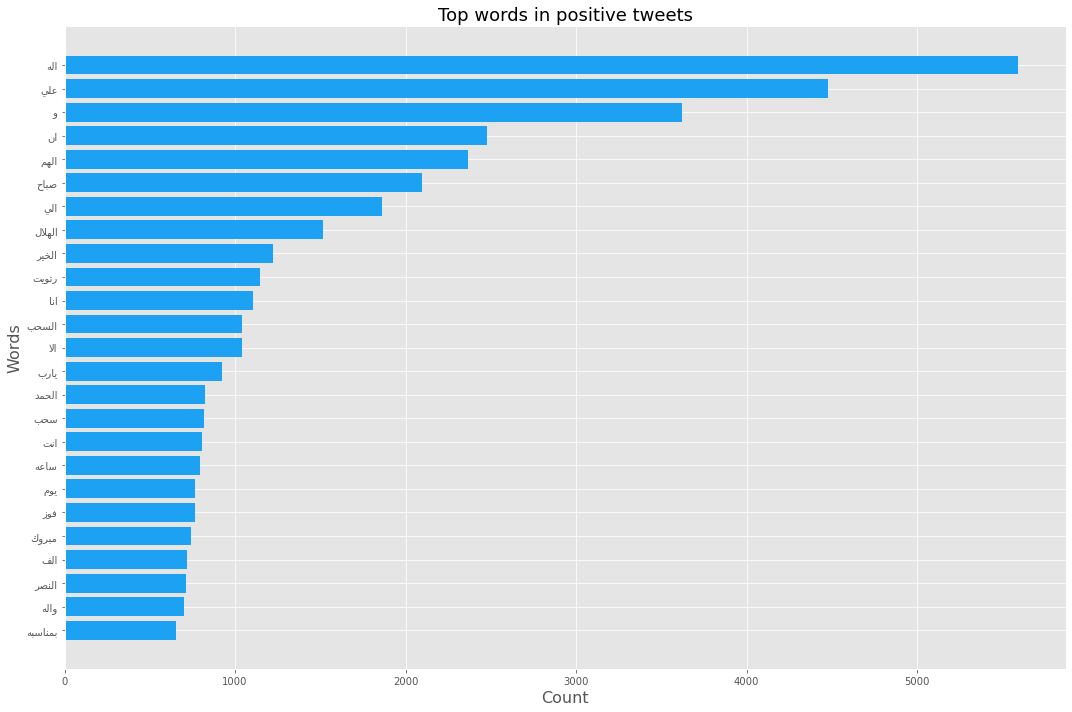

In [195]:
word_counter_df=pd.DataFrame(list(zip(words, counts)),
               columns =['word', 'freq'])
word_counter_df['disp'] = word_counter_df.word.apply(arabic_reshaper.reshape).apply(get_display)
# word_counter_df.plot.bar(x="disp", y="freq")
fig, ax= plt.subplots(figsize=(15, 10))
plt.barh(word_counter_df['disp'][::-1], word_counter_df['freq'][::-1], color='#1da1f2ff')
plt.title('Top words in positive tweets', fontsize=18)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Words', fontsize=16)
plt.tight_layout()
plt.savefig('image/postive_top_words.jpg');

# Arabic_tweets_negative dataset

In [196]:
cols = ['class','tweet_text']
negative = pd.read_csv('data/Arabic_tweets_negative_20190413.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [197]:
negative.head(50)

class                                         tweet_text
0    neg           ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ÿ±ÿ≠ŸÖŸá Ÿàÿßÿ≥ÿπŸá Ÿàÿßÿ≥ŸÉŸÜŸá ŸÅÿ≥Ÿäÿ≠ ÿ¨ŸÜÿßÿ™Ÿá üò¢
1    neg     ÿ±ÿßÿ≠ ŸÅŸäŸÜ ŸÉŸÑÿßŸÖŸÉ ÿßŸÑŸä ŸÉŸÜÿ™Ÿä ÿ®ÿ™ŸÇŸàŸÑŸäŸá üíî ÿ±ÿßŸäŸÉŸà ŸÅŸä ÿµŸàÿ™Ÿä
2    neg  ŸÉŸÑÿßŸÖ ÿßŸáŸÑŸáÿß ÿßŸÜŸáŸÖ ÿØÿÆŸÑŸàŸáÿß ŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ÿßŸÑÿßŸÖŸÑ ŸÑŸÖÿØÿ© ÿ¥Ÿáÿ± ÿπ...
3    neg                              ŸÑŸäÿ¥ ÿπŸÖ ÿ™ÿ≥ÿ®ŸÜÿß ŸäÿßŸÖÿÆÿ±ŸÅ üò°
4    neg  #ÿßŸÑÿ≥ÿπÿßÿØŸá_ÿØÿßŸäŸÖÿß_ŸáŸä ÿßÿ¥ÿ™ŸÇÿ™ ŸÑ ÿ≠ÿØŸäÿ´ŸÉ ÿå Ÿà ŸÉÿ£ŸÜŸä ŸÑŸÖ ÿßÿ≠...
5    neg   ÿßŸÑŸÑŸá Ÿäÿ≥ÿ™ÿ± üíî ŸàÿßŸÑŸÑŸá ŸÖŸà ŸÇÿßÿØÿ±ÿ© ÿ£ÿ™ÿÆŸäŸÑ ÿ≥ŸäŸÜÿßÿ±ŸäŸà ÿßŸÑÿÆÿ≥ÿßÿ±ÿ©
6    neg  ÿ≠ŸÇŸäŸÇŸä ÿßÿ≠ÿ≥ ÿ®ÿ¥Ÿäÿ° ŸÖŸÜ ÿßŸÑÿ≠ÿ≤ŸÜ ŸÑŸÖÿß ÿßÿ¥ŸàŸÅ ÿßŸàŸÑÿßÿØ ÿßŸà ÿ®ŸÜÿßÿ™...
7    neg                            ŸÖŸÜ ÿßŸàŸÑ .. ŸÖŸà ŸÖŸÜ ÿßŸÑÿ≠ŸäŸÜ üåö
8    neg                                  ÿßÿ¥ŸÅŸäŸá ÿµÿßŸÑÿ≠ ÿ∫ŸäŸÖŸá üòû
9    neg  ÿ®ŸÖŸàÿ™ ÿ∂ÿ≠ŸÉ ÿ®ÿ™ÿ≥ ŸÑŸáŸÖ ÿ´ŸÑÿßÿ´ ÿ≥ŸÜŸàÿßÿ™ ÿπÿ¥ÿßŸÜ Ÿäÿ≠ŸàŸÑŸàŸÜ ÿßŸÑŸÜÿßÿ≥ ...
10   neg  ŸÇÿ®ÿ∂Ÿàÿß ÿßŸÖŸÜÿ¨Ÿä ŸÅŸä ŸÅŸä ŸÜŸÇÿ∑ÿ© ÿ™ŸÅÿ™Ÿäÿ¥ ŸÖÿπÿßŸá ŸÖÿ≥ÿØÿ≥ Ÿà ŸÇŸäŸÑ ŸÖ...
11   neg  ÿßŸÑŸÇŸáŸàÿ© ÿßŸÑŸä ŸÉŸÜÿ™ ÿßÿ≥ŸàŸäŸáÿß ÿ∑ŸÑÿπÿ™ ÿÆÿ∑ÿ£ ÿ®ÿ≥ ÿßŸÑÿ∑ÿ±ŸäŸÇŸá ÿßŸÑÿµÿ≠...
12   neg                         ŸÖÿß ÿßŸÇÿ®ŸÑ ÿßÿπÿ™ÿ∞ÿßÿ± ÿ≤ÿπŸÑÿ™ ÿÆŸÑÿßÿµ üòè
13   neg                   ÿßŸÜÿß ÿØÿßÿ±ŸäŸá ŸÖÿß ŸÖŸÜŸÉ ÿ±ÿ¨ÿß ŸÑŸÉŸÜ ÿ®ÿßŸÑŸäÿ≤ üò≠
14   neg  ÿßÿ±ÿßÿ¨Ÿàÿ≤ ÿ®ÿ∂ÿ≠ŸÉ ŸÉŸÑ ÿÆŸÑŸÇ ÿßŸÑŸÑŸá ÿ®ÿ®ŸÉŸä ÿ®ÿπŸäÿØ ÿπŸÜ ÿπŸäŸÜ ÿµÿ≠ÿßÿ®Ÿä...
15   neg  ‚úîÔ∏è ÿßŸÑÿ≠ŸÑŸÇÿ© ÿßŸÑÿ™ÿßÿ≥ÿπÿ© ŸàÿßŸÑÿπÿ¥ÿ±ŸàŸÜ ŸÖŸÜ ÿßŸÑÿ≥Ÿäÿ±ÿ© ÿßŸÑŸÜÿ®ŸàŸäÿ© ŸÅ...
16   neg  : ŸÇÿ®ŸÑ ÿ±ŸÖÿ∂ÿßÿßŸÜ ..2019/1440 ÿ£ŸÜÿß ÿßÿ≥ŸÅ .. ÿ•ÿ∞ÿß ÿ≤ÿπŸÑÿ™ŸÉ ...
17   neg  üìö ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿ¥Ÿäÿßÿ° ŸÅŸä ÿ≠Ÿäÿßÿ™ŸÜÿß ÿ≤ÿ¨ÿßÿ¨Ÿäÿ© ÿßŸÑÿ™ŸÉŸàŸäŸÜ ‚òÅ ÿ•ÿ∞ÿß ÿ£...
18   neg             Ÿäÿß ŸÜÿßÿßÿ≥ ÿ£ÿ®ŸÇŸàÿß ÿßŸÑÿµŸÖŸàÿØ ŸáÿßÿßŸÜÿ™ ŸÖÿß ŸÅÿ∂ŸÑ ÿ¥Ÿä üò≠
19   neg  ÿ£ÿ±ÿ¨ŸàŸÉŸÖ Ÿä ŸÅÿ≠ŸàŸÑ ÿ™ÿπÿßŸÑŸà ÿßÿ≤ŸÜŸà ÿ®ÿ¥ÿ±ŸÅŸä ÿ≤Ÿàÿ¨ÿ™Ÿä ÿßŸÑŸÑŸä Ÿäÿ®ŸäŸá...
20   neg  ÿßŸÜÿ™Ÿà ŸÖÿßÿ®ÿ™ŸÜŸÖŸàŸà ŸÉŸÑ ÿ±ÿßÿ≥ ÿ≥ÿßÿπŸá ÿ®ŸäÿßŸÜ üò¢ ÿßŸÜÿß ŸÖÿ™ÿßÿ®ÿπÿßŸÉŸÖ ...
21   neg                                ÿ™ŸÇÿØÿ± ÿ™ÿ≠ŸÑ ŸÖÿ¥ŸÉŸÑÿ™Ÿä ÿü üò¢
22   neg        ŸÑÿß ŸÑÿß ŸÖÿß ÿ®ÿ∫ŸäŸÜÿßŸáÿß ŸÉÿ∞ÿß ÿπŸÑŸâ ŸáÿßŸÑÿßÿ¨Ÿàÿßÿ° ÿßŸÑÿ¨ŸÖŸäŸÑŸá üò´
23   neg  ŸÖÿ¥ŸÉŸÑŸá ŸÅŸäŸá ŸÜÿßÿ≥ ÿ®ÿ™ÿ∂Ÿäÿπ ÿ≠Ÿäÿßÿ™Ÿáÿß ŸÅŸÉÿØÿß ÿ≠ÿ±ŸÅŸäÿß ŸàŸÖŸÅŸÉÿ±ŸäŸÜ ...
24   neg  FINALLY üò™ ŸáŸÑÿ®ÿß ÿ™ŸÅÿßÿµŸäŸÑ !! ÿ™ÿπÿ®ÿ™ ŸÅŸäŸáÿß ÿ®ÿ¨ÿØ ÿ®ÿ≥ ÿ£ÿπÿ™ŸÇ...
25   neg                                    ÿßÿ®ŸäŸäŸáÿßÿß ÿ™ŸÉŸÅŸàŸÜ üíî
26   neg                                     üòí ÿπ ÿßÿ≥ÿßÿ≥ ÿ™ŸàŸäÿ™ŸÉ
27   neg  ŸÑÿß .. Ÿäÿ≥ŸÖŸàŸÜŸä ŸÅŸä ÿßŸÑŸÅÿ±ŸäŸÇ ŸÖŸÑŸÉ ÿßŸÑÿ≥ŸÜÿßŸÇŸÑ .. ŸàŸäÿ¥ ŸÅŸä ŸÖ...
28   neg  #ÿßŸÑŸàÿ∑ŸÜ_ŸÑÿßŸäÿ¥ÿ±ŸÅŸá_ÿßŸÑŸÅÿßÿ≥ÿØŸäŸÜ ŸÉŸäÿ≥ ÿßŸÑÿ¥ÿπŸÑÿßŸÜ ÿ™ÿ™ŸáŸÖŸÜÿß ÿ®ÿßŸÑ...
29   neg  ÿßÿ∞ÿß ÿ¨ÿßŸàÿ®ÿ™Ÿä ŸÖŸÖŸÉŸÜ ÿßÿ™ŸÜÿßŸÇÿ¥ ŸÖÿπÿßŸÉ ŸàŸÑŸÉŸÜ ŸÇÿßÿπÿØÿ© ÿ™ÿ≠ŸàÿµŸäŸÜ ...
30   neg               ŸÅŸä ÿ≠ŸÇ ŸÜŸÅÿ≥ŸÉ .. ŸÑÿßÿ≤ŸÖ ÿ™ŸÉŸàŸÜ ÿπÿ≤Ÿäÿ≤ ÿßŸÑŸÜŸÅÿ≥ üíî
31   neg  ŸÑÿßŸÜŸá ŸÑÿßŸäŸÖÿ¥Ÿä ŸÉŸÖÿß Ÿäÿ±ŸäÿØŸàŸÜ ‚Ä¢‚Ä¢ ÿßÿ∑ŸÑŸÇŸà Ÿáÿßÿ¥ÿ™ÿßŸÇ ( ŸÅÿ≥ÿßÿØ ...
32   neg  ÿ™ŸÑÿßÿ™ŸäŸÜ ÿ≥ŸÜÿ© ÿ®ÿ™ÿ±ŸÇÿµ .. ÿßŸÑŸÑŸäŸÑÿ© ÿ±ŸÇÿµÿ™ŸÜÿß ÿ£ŸÜÿß ÿ®ÿ®ŸÉŸä üò≠ ÿØ...
33   neg  ŸäŸàŸÖ ŸÑŸÉ ŸàŸäŸàŸÖ ÿπŸÑŸäŸÉ ÿ®ŸÉÿ±ÿß ÿ™ÿ¨ŸäŸÉ ÿßŸÑÿßÿÆÿ™ÿ®ÿßÿ±ÿßÿ™ ŸàÿßŸÑŸÉÿ±ŸÅ ÿµ...
34   neg  ÿßŸÑÿßŸÑÿ®ŸàŸÖ ÿ®ŸäŸÜŸÅÿ¨ÿ± ÿ≥ÿπÿßÿØÿ© ŸÖÿ´ŸÑŸä ÿ™ŸÖÿßŸÖÿß üíî #BLACKPINKxC...
35   neg                                ŸÜÿπŸÖÿå ÿßŸäŸáÿå Ÿäÿ®ÿå yes üôà
36   neg  #ÿßŸÑŸÖÿßŸÑ_ÿßŸà_ÿßŸÑÿ≠ÿ® ŸáŸÑ ÿ£ŸÜÿ™ ÿ® ÿ≠ÿßÿ¨Ÿá ÿ•ŸÑŸâ ÿ±ÿ™ŸàŸäÿ™ ÿ≠ŸÇŸäŸÇŸä ‚ú¥...
37   neg                        ÿ¥ŸÅŸäŸáÿß ŸÖÿπŸÑŸÇŸá ÿπŸÑŸâ ÿ®Ÿàÿ≥ ÿßŸÑÿ±ÿ¨ŸÑ üò≠
38   neg  _ ŸÇÿßŸÑ ÿßŸÑÿ±ÿ≥ŸàŸÑ ÿµŸÑÿ¶ ÿßŸÑŸÑŸá ÿπŸÑŸäŸá Ÿàÿ≥ŸÑŸÖ :( ŸÖŸÜ ÿ£ÿµÿ®ÿ≠ ŸÖŸÜŸÉ...
39   neg  üíî ŸÑŸäŸá Ÿäÿß ÿ≠ÿ®Ÿäÿ®ÿ™Ÿä ŸÖÿß ÿ®ŸäŸÜÿß ÿØÿßŸäŸÖÿß ÿ≥ŸÅÿ±..!! ‚óΩ ÿØÿß ÿßŸÑÿ®...
40   neg  ŸáŸÑ ÿ£ŸÜÿ™ ÿ® ÿ≠ÿßÿ¨Ÿá ÿ•ŸÑŸâ ÿ±ÿ™ŸàŸäÿ™ ÿ≠ŸÇŸäŸÇŸä ‚ú¥Ô∏è Ÿàÿ®ÿ¥ŸÉŸÑ ŸäŸàŸÖŸä ŸÑÿ™...
41   neg                        ÿ¨ÿ™ŸÜŸä ÿ∂ŸäŸÇŸá ŸÑŸÖÿß ŸÇÿ±Ÿäÿ™ ŸÖŸàÿßÿπŸäŸÜ üò≠
42   neg  ÿµÿ®ÿßÿ≠ ÿßŸÑŸÅŸÑ üåπ ÿµÿ®ÿßÿ≠ ŸÜÿßÿØŸä üçÉ ÿµÿ®ÿßÿ≠ŸÉŸÖ ÿ¨ÿßŸä ÿπ ÿßŸÑŸáÿßÿØŸä üíï ...

# Total no. of negative twittes

In [198]:
len(negative)

28326

# Sample of the negative twittes text

In [199]:
negative['tweet_text'].head()

0             ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ÿ±ÿ≠ŸÖŸá Ÿàÿßÿ≥ÿπŸá Ÿàÿßÿ≥ŸÉŸÜŸá ŸÅÿ≥Ÿäÿ≠ ÿ¨ŸÜÿßÿ™Ÿá üò¢
1       ÿ±ÿßÿ≠ ŸÅŸäŸÜ ŸÉŸÑÿßŸÖŸÉ ÿßŸÑŸä ŸÉŸÜÿ™Ÿä ÿ®ÿ™ŸÇŸàŸÑŸäŸá üíî ÿ±ÿßŸäŸÉŸà ŸÅŸä ÿµŸàÿ™Ÿä
2    ŸÉŸÑÿßŸÖ ÿßŸáŸÑŸáÿß ÿßŸÜŸáŸÖ ÿØÿÆŸÑŸàŸáÿß ŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ÿßŸÑÿßŸÖŸÑ ŸÑŸÖÿØÿ© ÿ¥Ÿáÿ± ÿπ...
3                                ŸÑŸäÿ¥ ÿπŸÖ ÿ™ÿ≥ÿ®ŸÜÿß ŸäÿßŸÖÿÆÿ±ŸÅ üò°
4    #ÿßŸÑÿ≥ÿπÿßÿØŸá_ÿØÿßŸäŸÖÿß_ŸáŸä ÿßÿ¥ÿ™ŸÇÿ™ ŸÑ ÿ≠ÿØŸäÿ´ŸÉ ÿå Ÿà ŸÉÿ£ŸÜŸä ŸÑŸÖ ÿßÿ≠...
Name: tweet_text, dtype: object

# Sample of the target 

In [200]:
negative['class'].head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [201]:
np.sum(negative.isnull().any(axis=1))

0

# EDA

In [202]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28326 entries, 0 to 28325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       28326 non-null  object
 1   tweet_text  28326 non-null  object
dtypes: object(2)
memory usage: 442.7+ KB


# Cleaning the text

In [203]:
for letter in '#.][!XRÔ∑∫':
    negative['tweet_text'] = negative['tweet_text'].astype(str).str.replace(letter,'')

In [205]:
negative.head(25)

class                                         tweet_text
0    neg           ÿ±ÿ≠ŸÖŸá ÿßŸÑŸÑŸá ÿ±ÿ≠ŸÖŸá Ÿàÿßÿ≥ÿπŸá Ÿàÿßÿ≥ŸÉŸÜŸá ŸÅÿ≥Ÿäÿ≠ ÿ¨ŸÜÿßÿ™Ÿá üò¢
1    neg     ÿ±ÿßÿ≠ ŸÅŸäŸÜ ŸÉŸÑÿßŸÖŸÉ ÿßŸÑŸä ŸÉŸÜÿ™Ÿä ÿ®ÿ™ŸÇŸàŸÑŸäŸá üíî ÿ±ÿßŸäŸÉŸà ŸÅŸä ÿµŸàÿ™Ÿä
2    neg  ŸÉŸÑÿßŸÖ ÿßŸáŸÑŸáÿß ÿßŸÜŸáŸÖ ÿØÿÆŸÑŸàŸáÿß ŸÖÿ≥ÿ™ÿ¥ŸÅŸâ ÿßŸÑÿßŸÖŸÑ ŸÑŸÖÿØÿ© ÿ¥Ÿáÿ± ÿπ...
3    neg                              ŸÑŸäÿ¥ ÿπŸÖ ÿ™ÿ≥ÿ®ŸÜÿß ŸäÿßŸÖÿÆÿ±ŸÅ üò°
4    neg  ÿßŸÑÿ≥ÿπÿßÿØŸá_ÿØÿßŸäŸÖÿß_ŸáŸä ÿßÿ¥ÿ™ŸÇÿ™ ŸÑ ÿ≠ÿØŸäÿ´ŸÉ ÿå Ÿà ŸÉÿ£ŸÜŸä ŸÑŸÖ ÿßÿ≠ÿß...
5    neg   ÿßŸÑŸÑŸá Ÿäÿ≥ÿ™ÿ± üíî ŸàÿßŸÑŸÑŸá ŸÖŸà ŸÇÿßÿØÿ±ÿ© ÿ£ÿ™ÿÆŸäŸÑ ÿ≥ŸäŸÜÿßÿ±ŸäŸà ÿßŸÑÿÆÿ≥ÿßÿ±ÿ©
6    neg  ÿ≠ŸÇŸäŸÇŸä ÿßÿ≠ÿ≥ ÿ®ÿ¥Ÿäÿ° ŸÖŸÜ ÿßŸÑÿ≠ÿ≤ŸÜ ŸÑŸÖÿß ÿßÿ¥ŸàŸÅ ÿßŸàŸÑÿßÿØ ÿßŸà ÿ®ŸÜÿßÿ™...
7    neg                              ŸÖŸÜ ÿßŸàŸÑ  ŸÖŸà ŸÖŸÜ ÿßŸÑÿ≠ŸäŸÜ üåö
8    neg                                  ÿßÿ¥ŸÅŸäŸá ÿµÿßŸÑÿ≠ ÿ∫ŸäŸÖŸá üòû
9    neg  ÿ®ŸÖŸàÿ™ ÿ∂ÿ≠ŸÉ ÿ®ÿ™ÿ≥ ŸÑŸáŸÖ ÿ´ŸÑÿßÿ´ ÿ≥ŸÜŸàÿßÿ™ ÿπÿ¥ÿßŸÜ Ÿäÿ≠ŸàŸÑŸàŸÜ ÿßŸÑŸÜÿßÿ≥ ...
10   neg  ŸÇÿ®ÿ∂Ÿàÿß ÿßŸÖŸÜÿ¨Ÿä ŸÅŸä ŸÅŸä ŸÜŸÇÿ∑ÿ© ÿ™ŸÅÿ™Ÿäÿ¥ ŸÖÿπÿßŸá ŸÖÿ≥ÿØÿ≥ Ÿà ŸÇŸäŸÑ ŸÖ...
11   neg  ÿßŸÑŸÇŸáŸàÿ© ÿßŸÑŸä ŸÉŸÜÿ™ ÿßÿ≥ŸàŸäŸáÿß ÿ∑ŸÑÿπÿ™ ÿÆÿ∑ÿ£ ÿ®ÿ≥ ÿßŸÑÿ∑ÿ±ŸäŸÇŸá ÿßŸÑÿµÿ≠...
12   neg                         ŸÖÿß ÿßŸÇÿ®ŸÑ ÿßÿπÿ™ÿ∞ÿßÿ± ÿ≤ÿπŸÑÿ™ ÿÆŸÑÿßÿµ üòè
13   neg                   ÿßŸÜÿß ÿØÿßÿ±ŸäŸá ŸÖÿß ŸÖŸÜŸÉ ÿ±ÿ¨ÿß ŸÑŸÉŸÜ ÿ®ÿßŸÑŸäÿ≤ üò≠
14   neg  ÿßÿ±ÿßÿ¨Ÿàÿ≤ ÿ®ÿ∂ÿ≠ŸÉ ŸÉŸÑ ÿÆŸÑŸÇ ÿßŸÑŸÑŸá ÿ®ÿ®ŸÉŸä ÿ®ÿπŸäÿØ ÿπŸÜ ÿπŸäŸÜ ÿµÿ≠ÿßÿ®Ÿä...
15   neg  ‚úîÔ∏è ÿßŸÑÿ≠ŸÑŸÇÿ© ÿßŸÑÿ™ÿßÿ≥ÿπÿ© ŸàÿßŸÑÿπÿ¥ÿ±ŸàŸÜ ŸÖŸÜ ÿßŸÑÿ≥Ÿäÿ±ÿ© ÿßŸÑŸÜÿ®ŸàŸäÿ© ŸÅ...
16   neg  : ŸÇÿ®ŸÑ ÿ±ŸÖÿ∂ÿßÿßŸÜ 2019/1440 ÿ£ŸÜÿß ÿßÿ≥ŸÅ  ÿ•ÿ∞ÿß ÿ≤ÿπŸÑÿ™ŸÉ ÿ£ŸÜÿß ...
17   neg  üìö ÿ®ÿπÿ∂ ÿßŸÑÿ£ÿ¥Ÿäÿßÿ° ŸÅŸä ÿ≠Ÿäÿßÿ™ŸÜÿß ÿ≤ÿ¨ÿßÿ¨Ÿäÿ© ÿßŸÑÿ™ŸÉŸàŸäŸÜ ‚òÅ ÿ•ÿ∞ÿß ÿ£...
18   neg             Ÿäÿß ŸÜÿßÿßÿ≥ ÿ£ÿ®ŸÇŸàÿß ÿßŸÑÿµŸÖŸàÿØ ŸáÿßÿßŸÜÿ™ ŸÖÿß ŸÅÿ∂ŸÑ ÿ¥Ÿä üò≠
19   neg  ÿ£ÿ±ÿ¨ŸàŸÉŸÖ Ÿä ŸÅÿ≠ŸàŸÑ ÿ™ÿπÿßŸÑŸà ÿßÿ≤ŸÜŸà ÿ®ÿ¥ÿ±ŸÅŸä ÿ≤Ÿàÿ¨ÿ™Ÿä ÿßŸÑŸÑŸä Ÿäÿ®ŸäŸá...
20   neg  ÿßŸÜÿ™Ÿà ŸÖÿßÿ®ÿ™ŸÜŸÖŸàŸà ŸÉŸÑ ÿ±ÿßÿ≥ ÿ≥ÿßÿπŸá ÿ®ŸäÿßŸÜ üò¢ ÿßŸÜÿß ŸÖÿ™ÿßÿ®ÿπÿßŸÉŸÖ ...
21   neg                                ÿ™ŸÇÿØÿ± ÿ™ÿ≠ŸÑ ŸÖÿ¥ŸÉŸÑÿ™Ÿä ÿü üò¢
22   neg        ŸÑÿß ŸÑÿß ŸÖÿß ÿ®ÿ∫ŸäŸÜÿßŸáÿß ŸÉÿ∞ÿß ÿπŸÑŸâ ŸáÿßŸÑÿßÿ¨Ÿàÿßÿ° ÿßŸÑÿ¨ŸÖŸäŸÑŸá üò´
23   neg  ŸÖÿ¥ŸÉŸÑŸá ŸÅŸäŸá ŸÜÿßÿ≥ ÿ®ÿ™ÿ∂Ÿäÿπ ÿ≠Ÿäÿßÿ™Ÿáÿß ŸÅŸÉÿØÿß ÿ≠ÿ±ŸÅŸäÿß ŸàŸÖŸÅŸÉÿ±ŸäŸÜ ...
24   neg  FINALLY üò™ ŸáŸÑÿ®ÿß ÿ™ŸÅÿßÿµŸäŸÑ  ÿ™ÿπÿ®ÿ™ ŸÅŸäŸáÿß ÿ®ÿ¨ÿØ ÿ®ÿ≥ ÿ£ÿπÿ™ŸÇÿØ ...

In [206]:
def processPost(tweet): 

    #delete @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #delete www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    tweet = re.sub(r'\s*[A-Za-z]+\b', '' , tweet)
    tweet = tweet.rstrip()
    
    return tweet

In [207]:
# apply used to call the method processpost
negative["tweet_text"] = negative['tweet_text'].apply(lambda x: processPost(x)) 

splits a string into substrings using a regular expression

In [208]:
tokenizer = RegexpTokenizer(r'\w+')
negative["tweet_text"] = negative["tweet_text"].apply(tokenizer.tokenize)

In [209]:
negative["tweet_text"].head()

0        [ÿ±ÿ≠ŸÖŸá, ÿßŸÑŸá, ÿ±ÿ≠ŸÖŸá, Ÿàÿßÿ≥ÿπŸá, Ÿàÿßÿ≥ŸÉŸÜŸá, ŸÅÿ≥Ÿäÿ≠, ÿ¨ŸÜÿßÿ™Ÿá]
1    [ÿ±ÿßÿ≠, ŸÅŸäŸÜ, ŸÉŸÑÿßŸÖŸÉ, ÿßŸÑŸä, ŸÉŸÜÿ™Ÿä, ÿ®ÿ™ŸÇŸàŸÑŸäŸá, ÿ±ÿßŸäŸÉŸà, ŸÅ...
2    [ŸÉŸÑÿßŸÖ, ÿßŸáŸÑŸáÿß, ÿßŸÜŸáŸÖ, ÿØÿÆŸÑŸàŸáÿß, ŸÖÿ≥ÿ™ÿ¥ŸÅŸä, ÿßŸÑÿßŸÖŸÑ, ŸÑŸÖÿØ...
3                             [ŸÑŸäÿ¥, ÿπŸÖ, ÿ™ÿ≥ÿ®ŸÜÿß, ŸäÿßŸÖÿÆÿ±ŸÅ]
4    [ÿßŸÑÿ≥ÿπÿßÿØŸáÿØÿßŸäŸÖÿßŸáŸä, ÿßÿ¥ÿ™ŸÇÿ™, ŸÑ, ÿ≠ÿØŸäÿ´ŸÉ, Ÿà, ŸÉÿßŸÜŸä, ŸÑŸÖ,...
Name: tweet_text, dtype: object

In [210]:
stopwords_list = stopwords.words('arabic')
w=['Ÿà', 'ÿßŸÜ', 'ÿπ', 'ÿßÿ∞ÿß', 'ÿßŸà', 'ÿßŸÑÿß', 'ŸÅ']
for i in w:
    stopwords_list.append(i)

In [211]:
negative["tweet_text"]=negative["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [214]:
negative['tweet_text'].head(25)

0         [ÿ±ÿ≠ŸÖŸá, ÿßŸÑŸá, ÿ±ÿ≠ŸÖŸá, Ÿàÿßÿ≥ÿπŸá, Ÿàÿßÿ≥ŸÉŸÜŸá, ŸÅÿ≥Ÿäÿ≠, ÿ¨ŸÜÿßÿ™Ÿá]
1     [ÿ±ÿßÿ≠, ŸÅŸäŸÜ, ŸÉŸÑÿßŸÖŸÉ, ÿßŸÑŸä, ŸÉŸÜÿ™Ÿä, ÿ®ÿ™ŸÇŸàŸÑŸäŸá, ÿ±ÿßŸäŸÉŸà, ÿµ...
2     [ŸÉŸÑÿßŸÖ, ÿßŸáŸÑŸáÿß, ÿßŸÜŸáŸÖ, ÿØÿÆŸÑŸàŸáÿß, ŸÖÿ≥ÿ™ÿ¥ŸÅŸä, ÿßŸÑÿßŸÖŸÑ, ŸÑŸÖÿØ...
3                              [ŸÑŸäÿ¥, ÿπŸÖ, ÿ™ÿ≥ÿ®ŸÜÿß, ŸäÿßŸÖÿÆÿ±ŸÅ]
4     [ÿßŸÑÿ≥ÿπÿßÿØŸáÿØÿßŸäŸÖÿßŸáŸä, ÿßÿ¥ÿ™ŸÇÿ™, ŸÑ, ÿ≠ÿØŸäÿ´ŸÉ, ŸÉÿßŸÜŸä, ÿßÿ≠ÿßÿØÿ´ŸÉ...
5     [ÿßŸÑŸá, Ÿäÿ≥ÿ™ÿ±, ŸàÿßŸÑŸá, ŸÖŸà, ŸÇÿßÿØÿ±Ÿá, ÿßÿ™ÿÆŸäŸÑ, ÿ≥ŸäŸÜÿßÿ±ŸäŸà, ÿß...
6     [ÿ≠ŸÇŸäŸÇŸä, ÿßÿ≠ÿ≥, ÿ®ÿ¥Ÿäÿ°, ÿßŸÑÿ≠ÿ≤ŸÜ, ÿßÿ¥ŸàŸÅ, ÿßŸàŸÑÿßÿØ, ÿ®ŸÜÿßÿ™, ŸÖ...
7                                      [ÿßŸàŸÑ, ŸÖŸà, ÿßŸÑÿ≠ŸäŸÜ]
8                                   [ÿßÿ¥ŸÅŸäŸá, ÿµÿßŸÑÿ≠, ÿ∫ŸäŸÖŸá]
9     [ÿ®ŸÖŸàÿ™, ÿ∂ÿ≠ŸÉ, ÿ®ÿ™ÿ≥, ÿ´ŸÑÿßÿ´, ÿ≥ŸÜŸàÿßÿ™, ÿπÿ¥ÿßŸÜ, Ÿäÿ≠ŸàŸÑŸàŸÜ, ÿßŸÑ...
10    [ŸÇÿ®ÿ∂Ÿàÿß, ÿßŸÖŸÜÿ¨Ÿä, ŸÜŸÇÿ∑Ÿá, ÿ™ŸÅÿ™Ÿäÿ¥, ŸÖÿπÿßŸá, ŸÖÿ≥ÿØÿ≥, ŸÇŸäŸÑ, ŸÖ...
11    [ÿßŸÑŸÇŸáŸàŸá, ÿßŸÑŸä, ŸÉŸÜÿ™, ÿßÿ≥ŸàŸäŸáÿß, ÿ∑ŸÑÿπÿ™, ÿÆÿ∑ÿß, ÿßŸÑÿ∑ÿ±ŸäŸÇŸá,...
12 

# Negative tweets text information

In [215]:
all_words = [word for tokens in negative["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in negative["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, with a vocabulary size of {len(VOCAB)}')
print(f'Max sentence length {max(sentence_lengths)}')

262242 words total, with a vocabulary size of 42686
Max sentence length 821


# # Top 25 words in negative comments

In [216]:
counter_n = Counter(all_words)

In [217]:
counter_n.most_common(135
                     )

[('ÿßŸÑŸá', 3170),
 ('ÿπŸÑŸä', 2684),
 ('ÿßŸÑŸä', 2430),
 ('ÿßŸÜÿß', 2024),
 ('ŸàÿßŸÑŸá', 1393),
 ('ÿßŸÑŸáŸÖ', 837),
 ('ÿßŸÑŸÜÿßÿ≥', 723),
 ('ÿßŸÜÿ™', 717),
 ('ŸÖŸà', 677),
 ('ÿßŸä', 667),
 ('ŸÉÿßŸÜ', 656),
 ('ŸÇÿ®ŸÑ', 637),
 ('ÿµÿ®ÿßÿ≠', 618),
 ('ŸÖÿ¥', 618),
 ('ŸäŸàŸÖ', 608),
 ('ÿ¥Ÿä', 606),
 ('ÿπÿ¥ÿßŸÜ', 590),
 ('Ÿäÿßÿ±ÿ®', 590),
 ('ŸäÿπŸÜŸä', 585),
 ('ŸÖÿßŸÅŸä', 573),
 ('ÿßŸÜŸä', 573),
 ('ÿØŸä', 534),
 ('ÿ≠ÿ™Ÿä', 529),
 ('ÿßÿ≠ÿØ', 505),
 ('ÿßŸÑŸäŸàŸÖ', 479),
 ('ŸÖÿ±Ÿá', 471),
 ('Ÿàÿßÿ≠ÿØ', 470),
 ('ŸÖ', 460),
 ('ÿßŸÑÿßÿ™ÿ≠ÿßÿØ', 459),
 ('ŸàÿßŸÜÿß', 452),
 ('ÿßŸÑŸáŸÑÿßŸÑ', 445),
 ('ÿßŸÜŸá', 434),
 ('ÿßŸÑÿÆŸäÿ±', 425),
 ('ŸÇŸÑÿ®Ÿä', 412),
 ('ŸÅÿ∂', 411),
 ('ÿßŸÑ', 409),
 ('ÿßŸÑÿßŸÖ', 404),
 ('ÿ≥ŸÜŸá', 401),
 ('ÿßŸÉÿ´ÿ±', 390),
 ('ÿ®', 387),
 ('ÿ®ÿßŸÑŸá', 382),
 ('Ÿä', 380),
 ('ÿßŸàŸÑ', 372),
 ('ŸÉŸÜÿ™', 370),
 ('ÿßŸÑŸäŸÑŸá', 353),
 ('ÿ¨ÿØÿß', 349),
 ('ŸÑŸäÿ¥', 346),
 ('ŸÑŸäŸá', 334),
 ('ÿ≠ÿßÿ¨Ÿá', 328),
 ('ÿßÿ±ÿ≠ŸÖ', 327),
 ('Ÿàÿ¥', 323),
 ('ÿßŸÑŸÇŸÑÿ®', 309),
 ('ŸÖÿ™Ÿä', 308),
 ('ŸÅ

In [218]:
words = []
counts = []
for letter, count in counter_n.most_common(25):
    words.append(letter)
    counts.append(count)

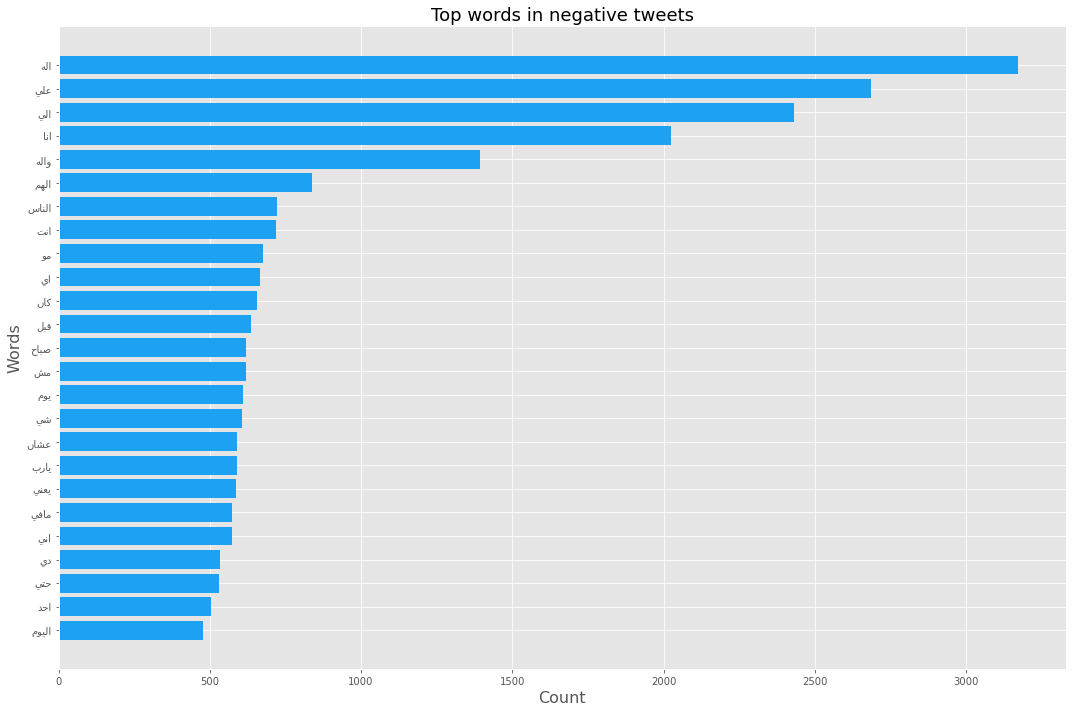

In [65]:
word_counter_n=pd.DataFrame(list(zip(words, counts)),
               columns =['word', 'freq'])
word_counter_n['disp'] = word_counter_n.word.apply(arabic_reshaper.reshape).apply(get_display)
# word_counter_df.plot.bar(x="disp", y="freq")
fig, ax=plt.subplots(figsize=(15,10))
ax.barh(word_counter_n.disp[::-1], word_counter_n.freq[::-1], color='#1da1f2ff')
plt.title('Top words in negative tweets', fontsize=18)
ax.set_xlabel('Count', fontsize=16)
ax.set_ylabel('Words', fontsize=16)
plt.tight_layout()
plt.savefig('image/negative_top_words.jpg');

In [219]:
# top_pword= counter.most_common(50)
top_nword=counter_n.most_common(50)
lst=[]
lst2=[]
# for tup1 in top_pword:
#     lst.append(tup1[0])
    
for tup2 in top_nword:
    lst2.append(tup2[0])




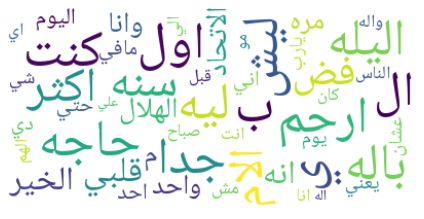

In [68]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_words=' '.join(tweet for tweet in lst)
word_cloud = WordCloud(font_path='Noto-unhinted/NotoNaskhArabic-Regular.ttf',stopwords=STOPWORDS, background_color="white", max_font_size=50, max_words=100)
word_cloud = word_cloud.generate_from_text(get_display(arabic_reshaper.reshape(all_words)))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('image/pwordcloud.jpg')
plt.show()



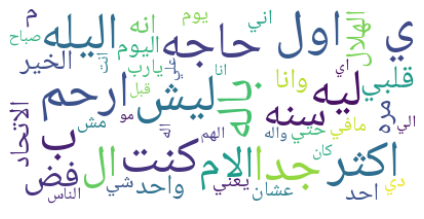

In [73]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_words=' '.join(tweet for tweet in lst2)
word_cloud = WordCloud(font_path='Noto-unhinted/NotoNaskhArabic-Regular.ttf',stopwords=STOPWORDS, background_color="white", max_font_size=50, max_words=50)
word_cloud = word_cloud.generate_from_text(get_display(arabic_reshaper.reshape(all_words)))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('image/nwordcloud.jpg')
plt.show()



# Prepare the Final Data

concatenate the postive and negative classes

In [220]:
full_data = pd.concat([positive, negative], axis=0, ignore_index=True)

In [221]:
full_data.head(-50)

class                                         tweet_text
0       pos                                 [ÿßŸÑŸá, ŸÇŸÅŸÑ, ŸÖŸäÿ™ŸäŸÜŸÉ]
1       pos  [ÿ∑Ÿäÿßÿ±, ÿπÿ±ÿßŸÇŸä, Ÿäÿ≥ÿßŸÑ, ÿ®ÿ±ÿ¨, ÿßŸÑŸÖÿ±ÿßŸÇÿ®Ÿá, ÿ≥ŸÑÿ∑ŸÜŸá, ÿπŸÖÿßŸÜ...
2       pos                    [ÿπŸÑŸÖŸáŸÖ, ÿ™ŸÉŸÅŸä, ÿ≠ÿ≥ÿ®Ÿä, ÿßŸÑŸá, ÿπŸÑŸäŸáŸÖ]
3       pos  [ŸàÿπŸÜ, ÿ∞ŸÉÿ±, ÿßŸÑŸá, ÿ™ÿ∫ŸÅŸÑŸàŸÜ, ÿßŸÑŸá, ÿßŸÑÿß, ÿßŸÑŸá, ÿßŸÑŸá, ÿßŸÑ...
4       pos  [ŸÉÿ´Ÿäÿ±, ÿ¨ŸÖŸáŸàÿ±, ÿßŸÑÿßŸáŸÑŸä, ŸäŸÇŸàŸÑ, ÿπÿ∑ŸÜÿß, ÿ™ÿ¥ŸÉŸäŸÑŸá, ÿßŸÑŸáŸÑ...
...     ...                                                ...
56807   neg  [ÿßŸÑŸÜÿßÿ≥, ÿßŸÑÿ∑ÿ®ŸäÿπŸäŸá, ÿ®ÿµÿØÿßŸÇÿ™ŸáŸÖ, ÿ™ŸÇŸàŸÑ, ÿßÿ≠ŸÜÿß, ŸÖŸÇÿ±ÿ®ŸäŸÜ...
56808   neg                            [ŸäŸÖŸÉŸÜ, ÿßŸÑŸÜÿ™, ÿ≠ŸÇŸáÿß, ÿÆŸÑÿµ]
56809   neg   [ÿßŸÑŸÖŸÇÿ∑ÿπ, ÿµÿ®ÿßÿ≠, ŸÑÿßÿ≤ŸÖ, ÿßÿ≥ŸÖÿπŸá, ÿµÿßÿ±, ÿßÿ≥ÿßÿ≥Ÿäÿßÿ™, ÿ≠Ÿäÿßÿ™Ÿä]
56810   neg                               [ŸÉÿßŸÜŸáÿß, ŸÉŸäŸÉÿ™ŸÉ, ÿßŸÜÿ™Ÿä]
56811   neg                                       [ÿ∂ÿ≠ŸàŸÉ, ÿßŸÜÿ™Ÿá]

[56812 rows x 2 columns]

In [222]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56862 entries, 0 to 56861
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       56862 non-null  object
 1   tweet_text  56862 non-null  object
dtypes: object(2)
memory usage: 888.6+ KB


In [223]:
len(full_data)

56862

In [224]:
y=full_data['class']
y.value_counts()

pos    28536
neg    28326
Name: class, dtype: int64

# Showing how the dataset is balance

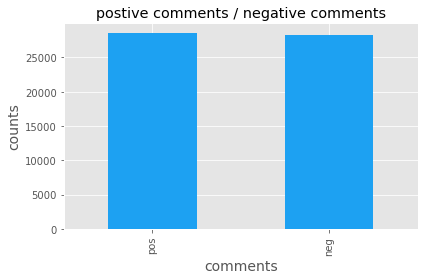

<Figure size 432x288 with 0 Axes>

In [225]:
full_data['class'].value_counts().plot(kind='bar', color='#1da1f2ff')
plt.title('postive comments / negative comments')
plt.xlabel('comments', fontsize=14)
plt.ylabel('counts', fontsize=14)
plt.savefig('image/balance_data.jpg')
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('image/balance_data.jpg', dpi=100)

# Convert class values (pos, neg) to (1,0) 

In [226]:
pro= preprocessing.LabelEncoder()
enc_pro=pro.fit_transform(full_data['class'])
full_data['class'] = enc_pro


# Save the final dataset

In [227]:
full_data.to_pickle('full_df.pickle')

In [230]:
full_df = pd.read_pickle('data/full_df.pickle')
full_df.head(-50)

class                                         tweet_text
0          1                                 [ÿßŸÑŸá, ŸÇŸÅŸÑ, ŸÖŸäÿ™ŸäŸÜŸÉ]
1          1  [ÿ∑Ÿäÿßÿ±, ÿπÿ±ÿßŸÇŸä, Ÿäÿ≥ÿßŸÑ, ÿ®ÿ±ÿ¨, ÿßŸÑŸÖÿ±ÿßŸÇÿ®Ÿá, ÿ≥ŸÑÿ∑ŸÜŸá, ÿπŸÖÿßŸÜ...
2          1                    [ÿπŸÑŸÖŸáŸÖ, ÿ™ŸÉŸÅŸä, ÿ≠ÿ≥ÿ®Ÿä, ÿßŸÑŸá, ÿπŸÑŸäŸáŸÖ]
3          1  [ŸàÿπŸÜ, ÿ∞ŸÉÿ±, ÿßŸÑŸá, ÿ™ÿ∫ŸÅŸÑŸàŸÜ, ÿßŸÑŸá, ÿßŸÑÿß, ÿßŸÑŸá, ÿßŸÑŸá, ÿßŸÑ...
4          1  [ŸÉÿ´Ÿäÿ±, ÿ¨ŸÖŸáŸàÿ±, ÿßŸÑÿßŸáŸÑŸä, ŸäŸÇŸàŸÑ, ÿπÿ∑ŸÜÿß, ÿ™ÿ¥ŸÉŸäŸÑŸá, ÿßŸÑŸáŸÑ...
...      ...                                                ...
56807      0  [ÿßŸÑŸÜÿßÿ≥, ÿßŸÑÿ∑ÿ®ŸäÿπŸäŸá, ÿ®ÿµÿØÿßŸÇÿ™ŸáŸÖ, ÿ™ŸÇŸàŸÑ, ÿßÿ≠ŸÜÿß, ŸÖŸÇÿ±ÿ®ŸäŸÜ...
56808      0                            [ŸäŸÖŸÉŸÜ, ÿßŸÑŸÜÿ™, ÿ≠ŸÇŸáÿß, ÿÆŸÑÿµ]
56809      0   [ÿßŸÑŸÖŸÇÿ∑ÿπ, ÿµÿ®ÿßÿ≠, ŸÑÿßÿ≤ŸÖ, ÿßÿ≥ŸÖÿπŸá, ÿµÿßÿ±, ÿßÿ≥ÿßÿ≥Ÿäÿßÿ™, ÿ≠Ÿäÿßÿ™Ÿä]
56810      0                               [ŸÉÿßŸÜŸáÿß, ŸÉŸäŸÉÿ™ŸÉ, ÿßŸÜÿ™Ÿä]
56811      0                                       [ÿ∂ÿ≠ŸàŸÉ, ÿßŸÜÿ™Ÿá]

[56812 rows x 2 columns]

In [231]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56862 entries, 0 to 56861
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       56862 non-null  int64 
 1   tweet_text  56862 non-null  object
dtypes: int64(1), object(1)
memory usage: 888.6+ KB


In [232]:
full_df['tweet_text'][23]

['ŸÖŸÑÿÆÿµ', 'ŸÖÿ®ÿßÿ±ÿßŸá', 'ÿßŸÑÿßŸáŸÑŸä', 'ÿßŸÑŸáŸÑÿßŸÑ', 'ÿßŸÑÿßŸáŸÑŸäÿßŸÑŸáŸÑÿßŸÑ']

In [233]:
full_df['length']=full_df['tweet_text'].apply(len)

In [234]:
full_df['length']

0         3
1        12
2         5
3        20
4        19
         ..
56857    13
56858    13
56859     2
56860    10
56861     6
Name: length, Length: 56862, dtype: int64

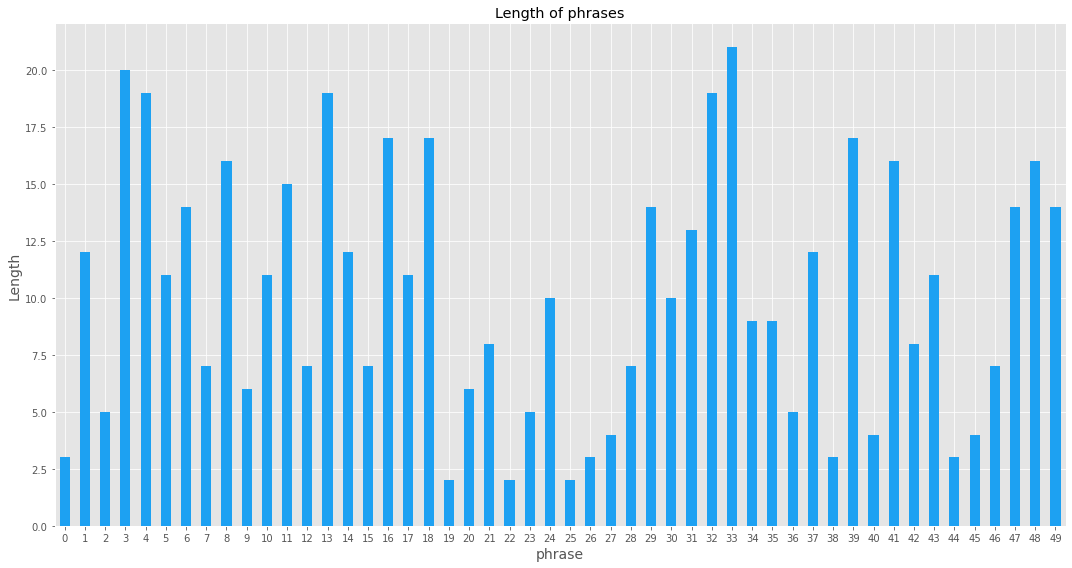

<Figure size 432x288 with 0 Axes>

In [235]:
ax, fig= plt.subplots(figsize=(15, 8))
full_df['length'][:50].plot(kind='bar', color='#1da1f2ff')
plt.title('Length of phrases')
plt.xlabel('phrase', fontsize=14)
plt.ylabel('Length', fontsize=14)
plt.xticks(rotation=0)
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('image/phrase_length.jpg', dpi=100)

# Machine Learning part

# TFIDF

In [236]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

word_vec= word_vectorizer.fit_transform(full_df['tweet_text'].astype('str'))
word_vec = word_vec.toarray()

vocab = word_vectorizer.get_feature_names()
word_vec_features=pd.DataFrame(word_vec, columns=vocab)
word_vec_features.head(10)

10   15   16  1953   30  30ŸÖ   40  412  413  419  ...  Ÿ≥ŸÜŸÉ   ⁄©ŸÑ   ⁄™ŸÑ   ⁄™ŸÜ  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   ⁄Øÿ´Ÿäÿ±ÿß  €ÜŸÅŸäŸÖÿß   €àŸÑ  €åÿ®ŸÇ€å  €åŸàŸÖ   ‡∏¨w  
0    0.0    0.0  0.0   0.0  0.0  0.0  
1    0.0    0.0  0.0   0.0  0.0  0.0  
2    0.0    0.0  0.0   0.0  0.0  0.0  
3    0.0    0.0  0.0   0.0  0.0  0.0  
4    0.0    0.0  0.0   0.0  0.0  0.0  
5    0.0    0.0  0.0   0.0  0.0  0.0  
6    0.0    0.0  0.0   0.0  0.0  0.0  
7    0.0    0.0  0.0   0.0  0.0  0.0  
8    0.0    0.0  0.0   0.0  0.0  0.0  
9    0.0    0.0  0.0   0.0  0.0  0.0  

[10 rows x 10000 columns]

In [237]:
y=full_df['class']
X=word_vec_features

In [238]:
X.shape, y.shape

((56862, 10000), (56862,))

# Spliting Dataset into 80% Training and 20% Testing

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2, shuffle=False)
scores = []

In [246]:
y_test.head(
)

45489    0
45490    0
45491    0
45492    0
45493    0
Name: class, dtype: int64

# Machine Learning Algorithms

# 1- Naive Bayes Algorithm

A- Multinomial Naive Bayes algorthim

In [247]:
mnb=MultinomialNB()
mnb=mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
mnb_1=mnb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(mnb.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))
scores.append(round(mnb_1, 3))

Accuracy= 0.567
Precision= 0.000
Recall= 0.000
F1= 0.000


B- Gaussian Naive Bayes algorthim

In [248]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))

Accuracy= 0.855
Precision= 0.000
Recall= 0.000
F1= 0.000


In [249]:
scores.append(round(nb_1, 3))
scores

[0.567, 0.855]

# 2- Ridge Classifier

In [250]:
RC= RidgeClassifier()
RC= RC.fit(X_train , y_train)
y_pred = RC.predict(X_test)
rc_1=RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))

Accuracy= 0.604
Precision= 0.000
Recall= 0.000
F1= 0.000


In [251]:
scores.append(round(rc_1, 3))
scores

[0.567, 0.855, 0.604]

# 3- LogisticRegression Algorithm

Using C=1 which is regularization and it is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.

In [252]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))

Accuracy= 0.570
Precision= 0.000
Recall= 0.000
F1= 0.000


In [253]:
scores.append(round(lr_1, 3))
scores

[0.567, 0.855, 0.604, 0.57]

# 4- Random Foreset Algorthim

In [255]:
RF=RandomForestClassifier(max_depth=5, n_estimators=100)
RF= RF.fit(X_train , y_train)
y_pred = RF.predict(X_test)
RF_1=RF.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RF.score(X_test, y_test)))
print('Precision= {:.3f}'.format(round(precision_score(y_test, y_pred),2)))
print('Recall= {:.3f}'.format(round(recall_score(y_test, y_pred),2)))
print('F1= {:.3f}'.format(round(f1_score(y_test, y_pred),2)))

Accuracy= 0.020
Precision= 0.000
Recall= 0.000
F1= 0.000


In [90]:
scores.append(round(RF_1, 3))
scores

[0.764, 0.735, 0.779, 0.783, 0.672]

# Algorithms Results comparison

In [60]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on Accuracy")
x.field_names = ["Model", "Accuracy"]

x.add_row(["Multinomail Naive Bayes Algorithm", round(mnb_1,3)])
x.add_row(["Naive Bayes Algorithm", round(nb_1,3)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1,3)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,3)])
x.add_row(["Random Forest Algorithm", round(RF_1,3)])

print(x)
print('\n')



Comparison of all algorithms on Accuracy
+-----------------------------------+----------+
|               Model               | Accuracy |
+-----------------------------------+----------+
| Multinomail Naive Bayes Algorithm |  0.764   |
|       Naive Bayes Algorithm       |  0.735   |
|     Ridge Classifier Algorithm    |  0.779   |
|   Logistic Regression Algorithm   |  0.783   |
|      Random Forest Algorithm      |  0.672   |
+-----------------------------------+----------+




# Plot the caomparision between models scores

In [123]:
names = ["Multinomial_NB", "Gaussian_Process", "Ridge_classifier", "logstic_regression", "Random_Forest"]
# "Multi_layer_perseptron", "convolutional neural networks"
df = pd.DataFrame(list(zip(names,scores)),
               columns =['Name', 'val'])
df



Name    val
0      Multinomial_NB  0.764
1    Gaussian_Process  0.735
2    Ridge_classifier  0.779
3  logstic_regression  0.783
4       Random_Forest  0.672

In [160]:
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

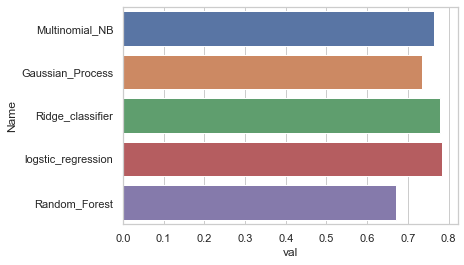

In [173]:
# sns.set(style="whitegrid")
ax = sns.barplot(y="Name", x="val", data=df)

In [256]:
RC =LogisticRegression(penalty = 'l2')
RC.fit(X_train,y_train)

LogisticRegression()

In [257]:
twt=['ÿßÿ¥ÿ™ŸÇÿ™ ŸÑ ÿ≠ÿØŸäÿ´ŸÉ ÿå Ÿà ŸÉÿ£ŸÜŸä ŸÑŸÖ ÿßÿ≠ÿßÿØÿ´ŸÉ ŸÖŸÜÿ∞ ÿ≥ŸÜŸäŸÜ üíî']

In [258]:
x = word_vectorizer.transform(twt)

In [259]:
pred=RC.predict(x)
# pred=pro.inverse_transform(pred)
# prediction=pd.DataFrame(pred, columns=['Prediction']) 
if pred >= 1:
    print('positive')
else:
    print('negative')

pred

negative


array([0])

# Deep Learning

1- Multi layer perseptron

In [260]:
# first neural network with keras tutorial

# define the keras model

model = Sequential()
model.add(Dense(12, input_dim=10000, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=65, batch_size=64)


Epoch 1/65
711/711 [==============================] - 4s 2ms/step - loss: 0.5209 - accuracy: 0.7246
Epoch 2/65
711/711 [==============================] - 2s 2ms/step - loss: 0.4041 - accuracy: 0.8208
Epoch 3/65
711/711 [==============================] - 2s 2ms/step - loss: 0.3600 - accuracy: 0.8426
Epoch 4/65
711/711 [==============================] - 2s 2ms/step - loss: 0.3340 - accuracy: 0.8561
Epoch 5/65
711/711 [==============================] - 2s 2ms/step - loss: 0.3132 - accuracy: 0.8677
Epoch 6/65
711/711 [==============================] - 2s 2ms/step - loss: 0.2956 - accuracy: 0.8777
Epoch 7/65
711/711 [==============================] - 2s 2ms/step - loss: 0.2788 - accuracy: 0.8866
Epoch 8/65
711/711 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.8954
Epoch 9/65
711/711 [==============================] - 1s 2ms/step - loss: 0.2469 - accuracy: 0.9023
Epoch 10/65
711/711 [==============================] - 2s 2ms/step - loss: 0.2330 - accuracy: 0.9089

In [101]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                120012    
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 120,125
Trainable params: 120,125
Non-trainable params: 0
_________________________________________________________________


# Using the model to predict the class of new tweets

In [262]:
twt=['ÿßÿ∞ŸÉÿ±ŸÉ ŸÉŸÜÿ™ ÿ≥ÿπŸäÿØ ÿ¨ÿØÿß ŸÅŸä ÿßŸÑŸÑÿπÿ® ŸÖÿπ ÿßÿ®ŸÜŸä Ÿàÿßÿ™ŸàŸÇÿπŸÉ ÿ≥ÿπŸäÿØ ŸÖÿπ ÿßÿ®ŸÜÿ™ŸÉ ÿßŸÑÿßŸÜ']
x = word_vectorizer.transform(c)

In [263]:
x.sort_indices()
pred=model.predict(x)
if pred >= 0.5:
    print('positive')
else:
    print('negative')

pred

positive


array([[0.6959219]], dtype=float32)

In [143]:
early_stopping = EarlyStopping()
history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=1,
    callbacks=[early_stopping]
)

EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    min_delta=0, 
    mode='auto'
)

Epoch 1/50
569/569 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9770 - val_loss: 0.2918 - val_accuracy: 0.8751


In [261]:
# evaluate
acc = model.evaluate(X_test, y_test)
acc

356/356 [==============================] - 1s 1ms/step - loss: 3.9238 - accuracy: 0.6226


[3.923757553100586, 0.6226149797439575]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


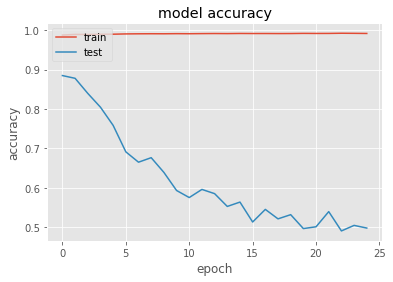

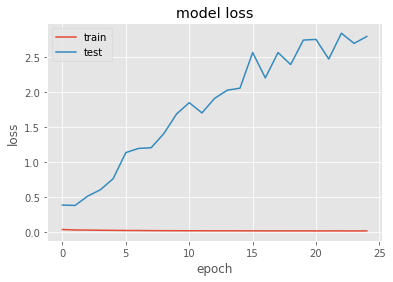

In [264]:



# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=25, batch_size=10, verbose=0)

# early_stopping = EarlyStopping()
# history = model.fit(
#     X_train, 
#     y_train, 
#     epochs=50, 
#     validation_split=0.20, 
#     batch_size=64, 
#     verbose=1,
#     callbacks=[early_stopping]
# )

# EarlyStopping(
#     monitor='val_loss', 
#     patience=5, 
#     min_delta=0, 
#     mode='auto'
# )
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [160]:
vocab_size=10000

model2=Sequential()
model2.add(Embedding(vocab_size, 16))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [161]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=65, batch_size=64, validation_data=(X_test, y_test), verbose=1)



Epoch 1/65
285/711 [===========>..................] - ETA: 12:23 - loss: 0.6604 - accuracy: 0.6306

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten
from tensorflow.keras.layers import *

In [150]:

# first convolutional neural networks with keras tutorial

# define the model

model = Sequential()
model.add(Embedding(1000, 300, input_length=1000))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2,2))
model.add(Conv1D(32,3,activation='relu'))
model.add(MaxPooling1D(2,2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [153]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=30, batch_size=64)

Epoch 1/30
 22/711 [..............................] - ETA: 18:37 - loss: 0.6602 - accuracy: 0.6371

KeyboardInterrupt: 

In [155]:
cnn_model = Sequential()
cnn_model.add(Conv1D(1, 1000, 500))
cnn_model.add(MaxPool1D())
cnn_model.add(Conv1D(1, 1000, 500))
cnn_model.add(MaxPool1D())
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [158]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, verbose=2)

Epoch 1/10


ValueError: in user code:

    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/marwahfaraj/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:235 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_14 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 10000)
